<a href="https://colab.research.google.com/github/AMANDASTHE/mcom-prep-portfolio/blob/main/projects/week1-intro-eda/notebooks/01_initial_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Week 1 — Initial Exploratory Data Analysis (EDA)
###Exploratory Data Analysis — House Prices Dataset

The goal of this analysis is to explore the Kaggle “House Prices: Advanced Regression Techniques” dataset and develop a structured understanding of:

* the dataset’s structure and variable types

* missing data patterns

* the distribution of numeric and categorical features

* correlations among variables

* the strength of relationships between predictors and the target variable (SalePrice)

This represents a foundational stage in the modelling workflow and guides decisions for data cleaning, feature engineering, and model selection.

---

## 📂 Dataset
File: `House Prices: Advanced Regression Techniques`  
Rows: 1,460  
Domain: Sale price prediction
Target variable: `Sale Price`

Let’s begin.


In [12]:
#Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")




In [14]:
# Load data
url = "https://raw.githubusercontent.com/AMANDASTHE/mcom-prep-portfolio/main/projects/week1-intro-eda/data/raw/train.csv"
df = pd.read_csv(url)
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## 📊 Dataset Snapshot

We start with an overview of the dataset structure, variable types, and completeness.


In [15]:
print("Shape:", df.shape)

print("\n--- Info ---")
df.info()

print("\n--- Summary Statistics ---")
df.describe(include='all')

Shape: (1460, 81)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count         588  1452.000000      1460      1460       1460     1423   
unique          3          NaN         4         

## 🧩 Missing Values Analysis

Understanding missingness helps guide imputation and feature engineering.


In [18]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

## 📈🗂️ Variable Distributions

-This helps identify skewness, heavy tails, and potential outliers of numerical
variable.

-We also inspect distributions of categorical fields to understand class imbalances.


In [20]:
# Identify variable types
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Split numeric into continuous/discrete
discrete_cols = [col for col in numeric_cols if df[col].nunique() < 20]
continuous_cols = [col for col in numeric_cols if df[col].nunique() >= 20]

# High vs low cardinality categorical -- sub cats in categorical varaibles
low_cardinality = [col for col in categorical_cols if df[col].nunique() <= 10]
high_cardinality = [col for col in categorical_cols if df[col].nunique() > 10]

print("Continuous numeric:", len(continuous_cols))
print(continuous_cols)
print("Discrete numeric:", len(discrete_cols))
print(discrete_cols)
print("Low-cardinality categorical:", len(low_cardinality))
print(low_cardinality)
print("High-cardinality categorical:", len(high_cardinality))
print(high_cardinality)

Continuous numeric: 23
['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
Discrete numeric: 15
['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']
Low-cardinality categorical: 40
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Gar

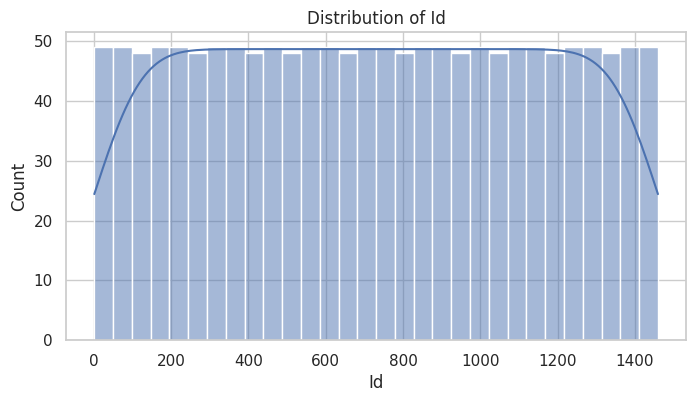

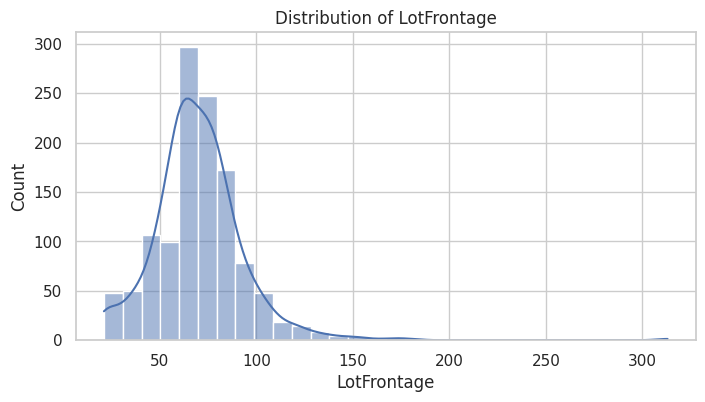

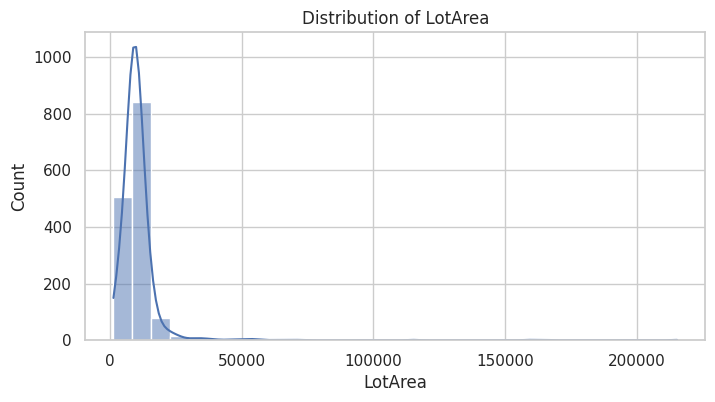

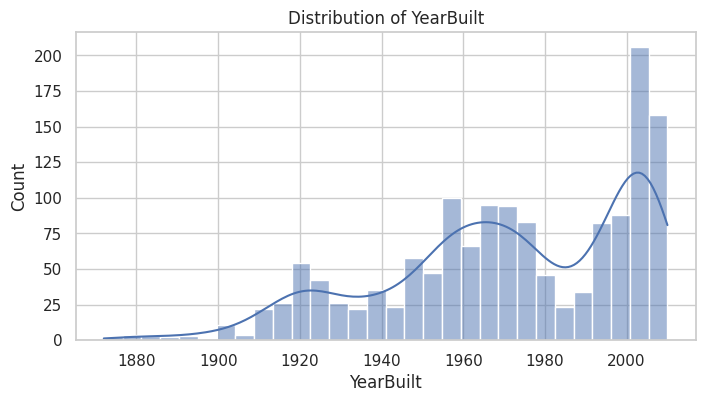

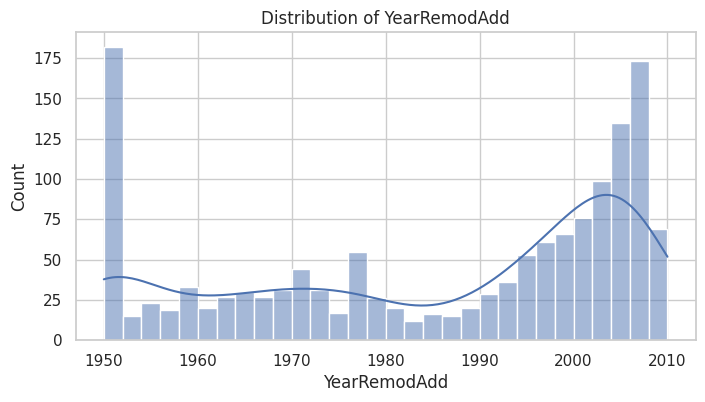

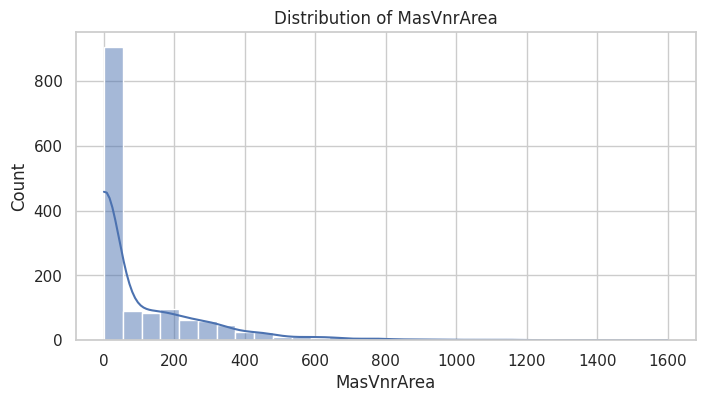

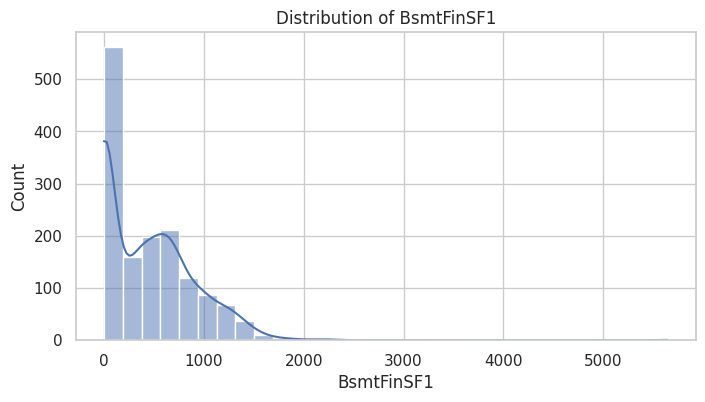

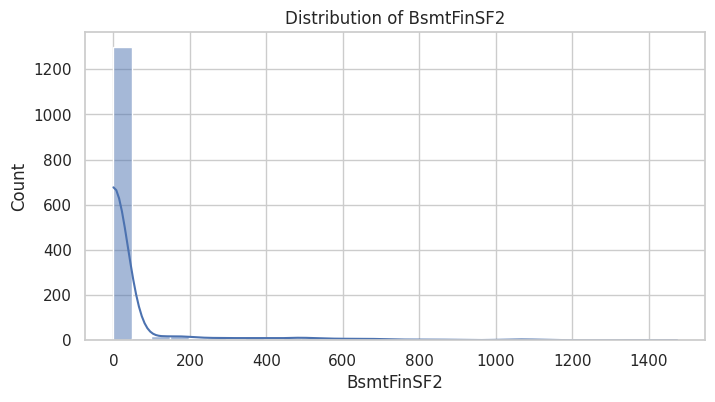

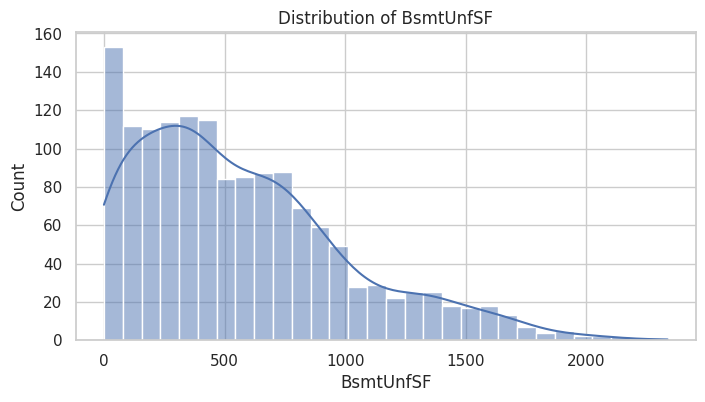

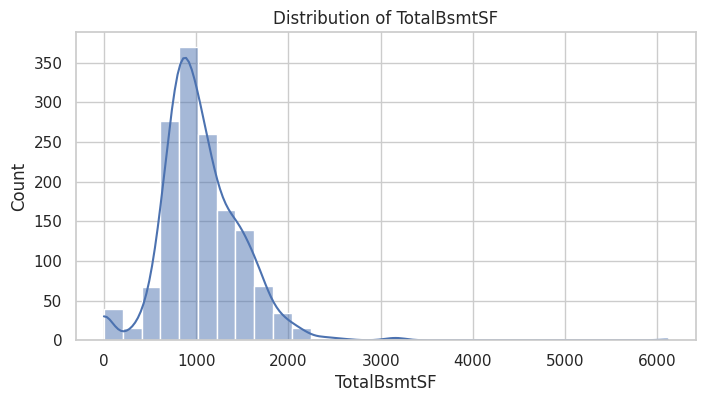

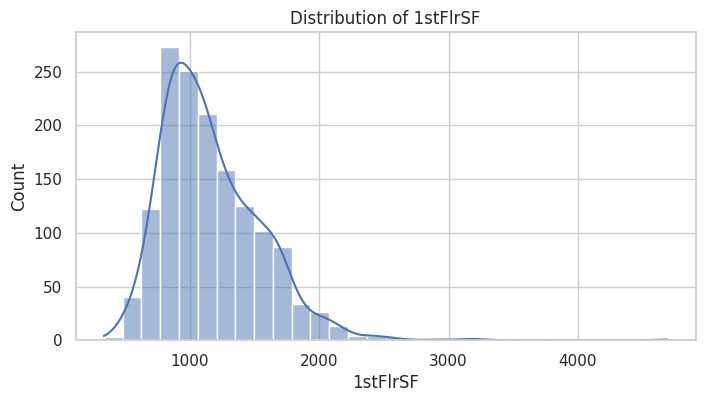

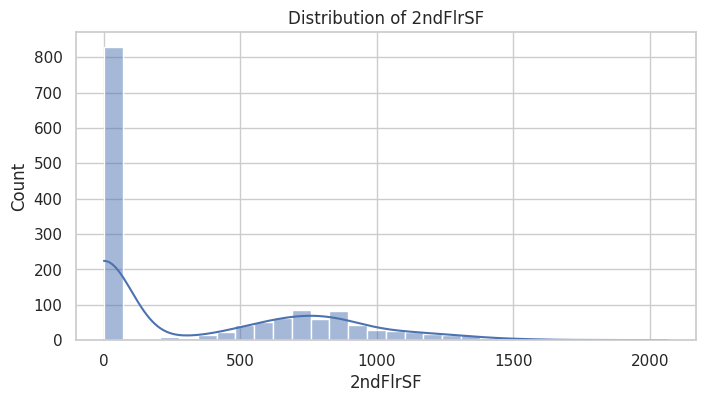

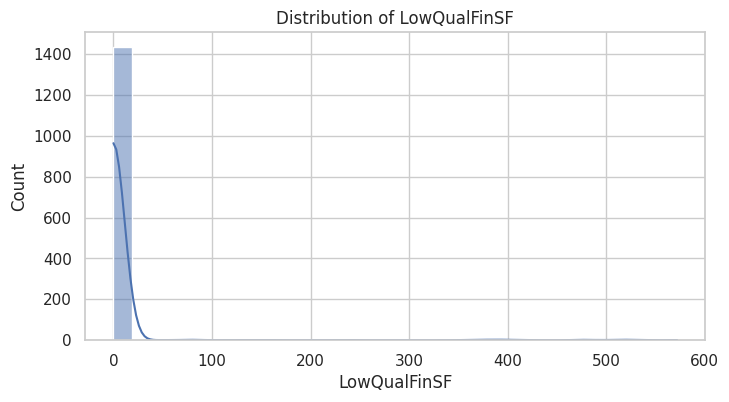

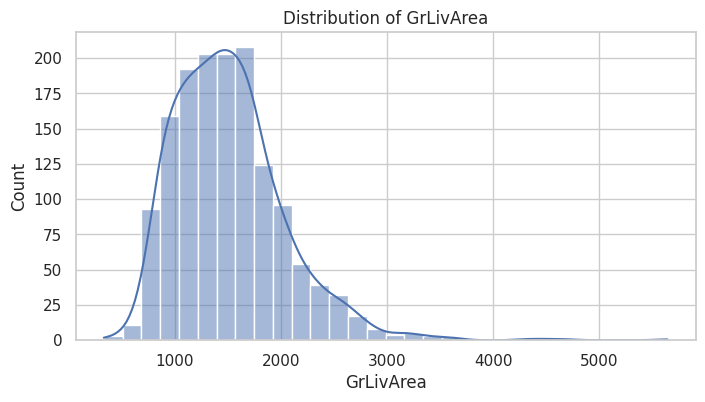

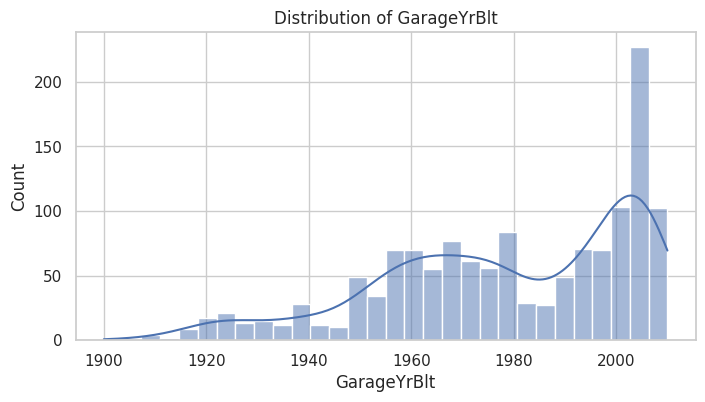

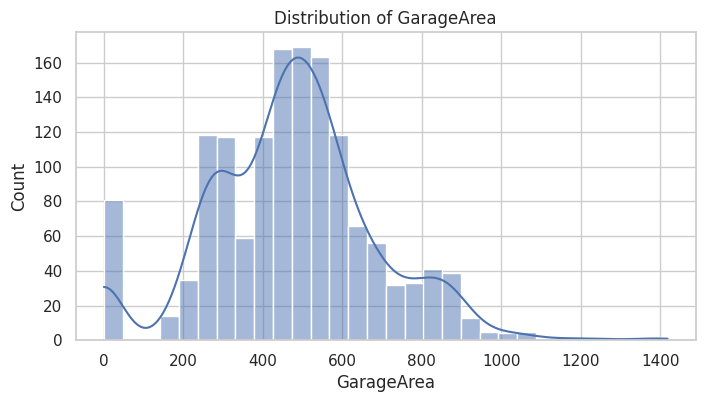

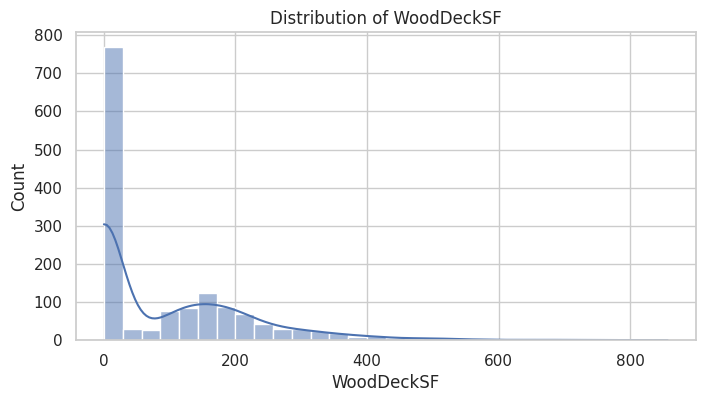

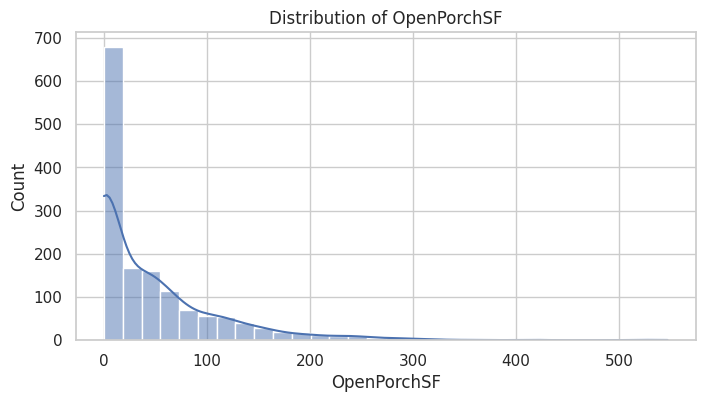

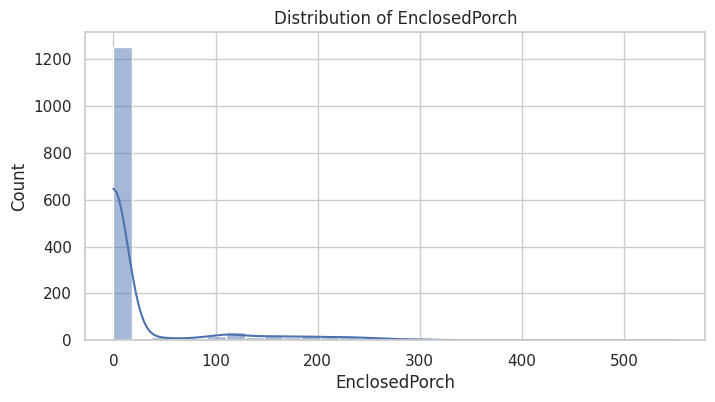

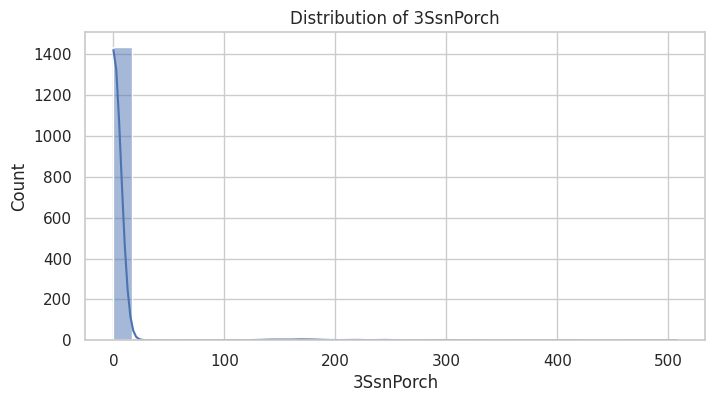

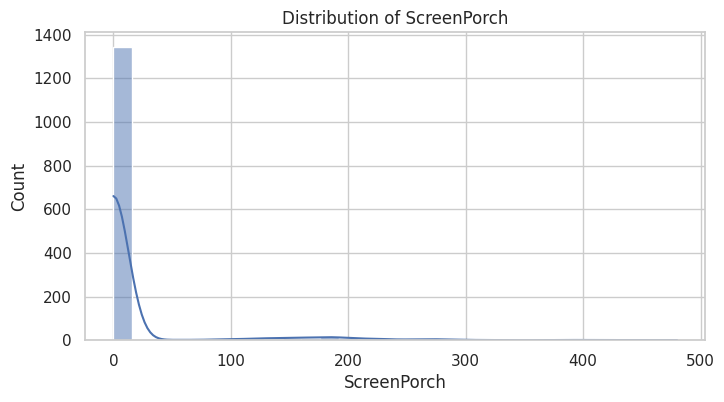

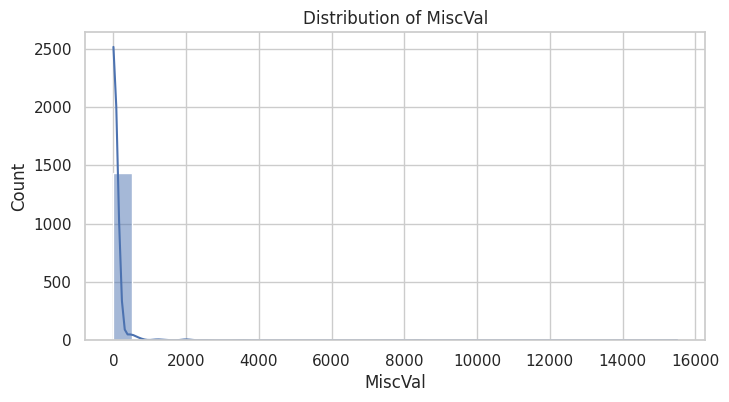

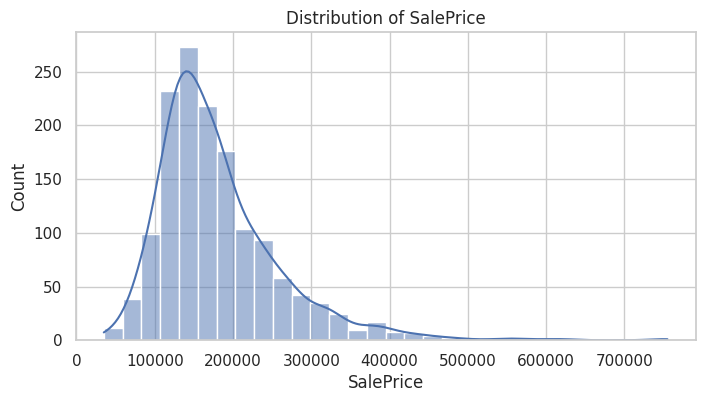

In [23]:
for col in continuous_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()




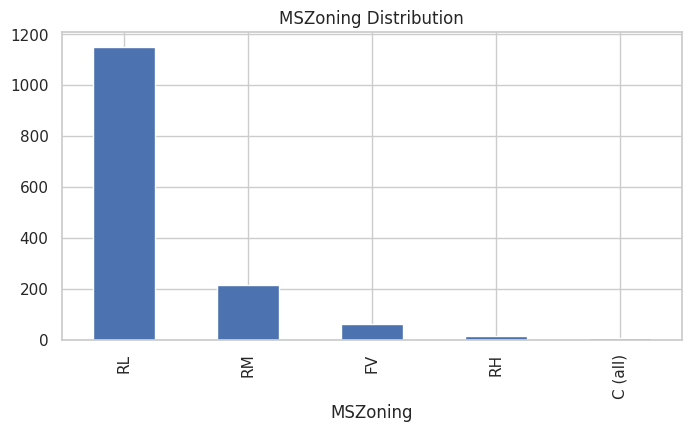

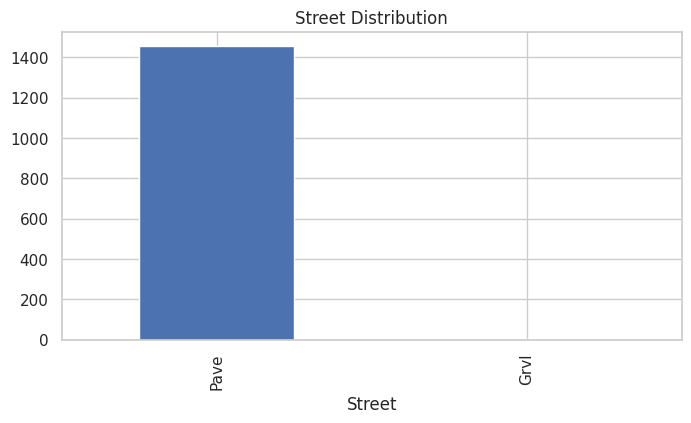

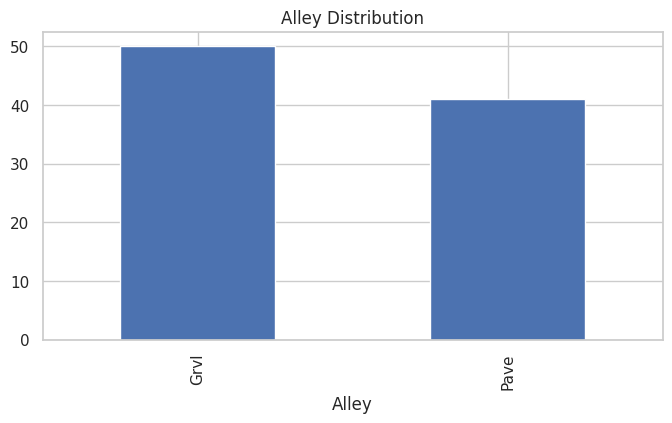

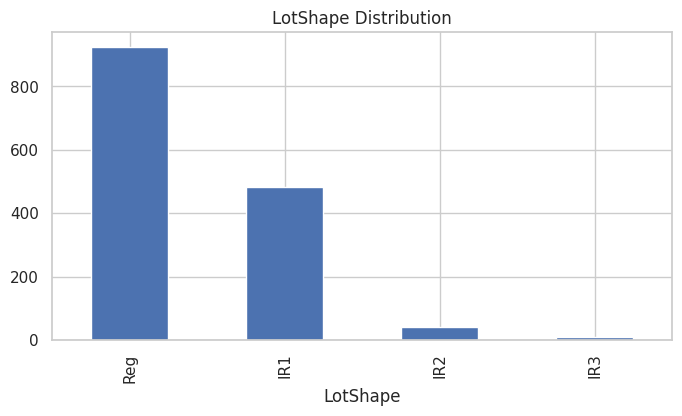

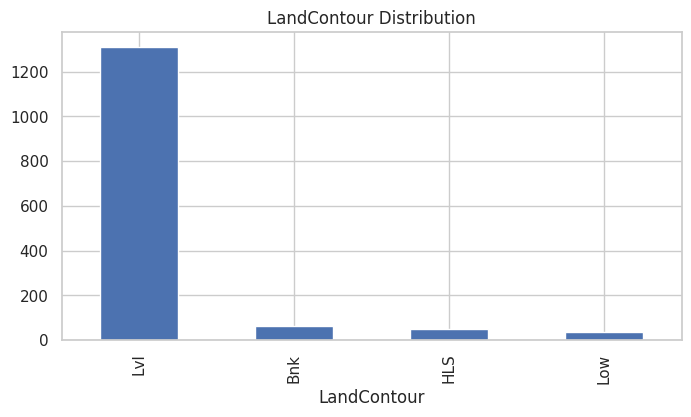

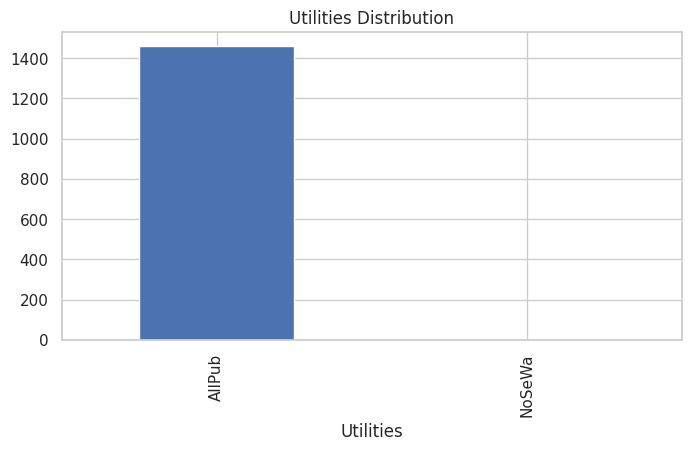

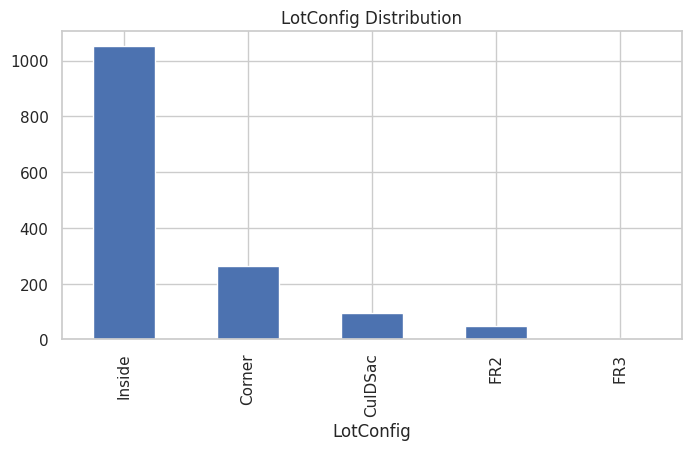

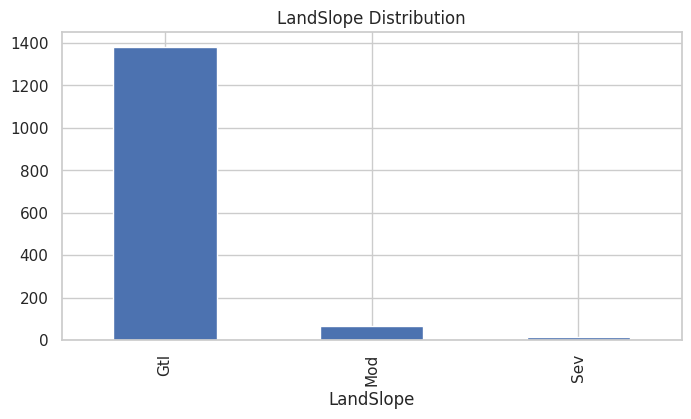

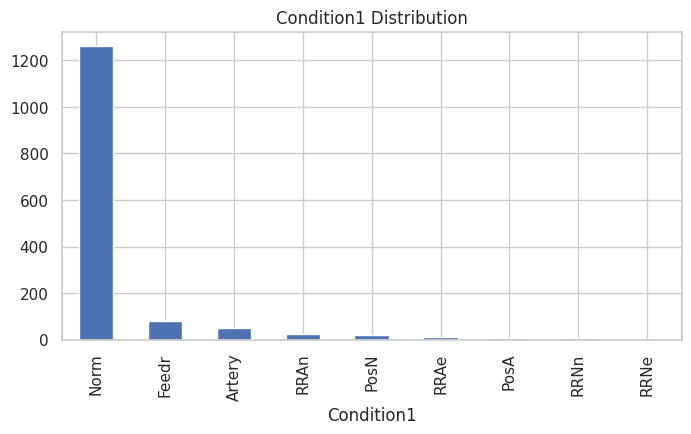

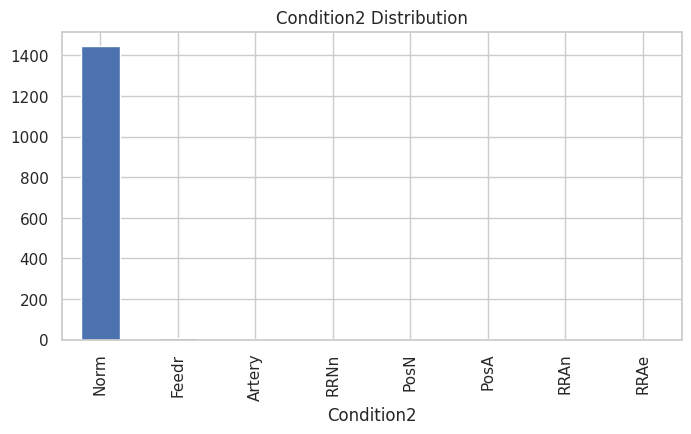

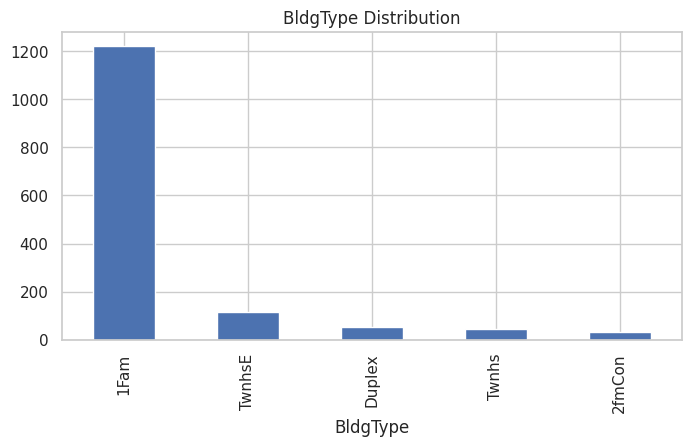

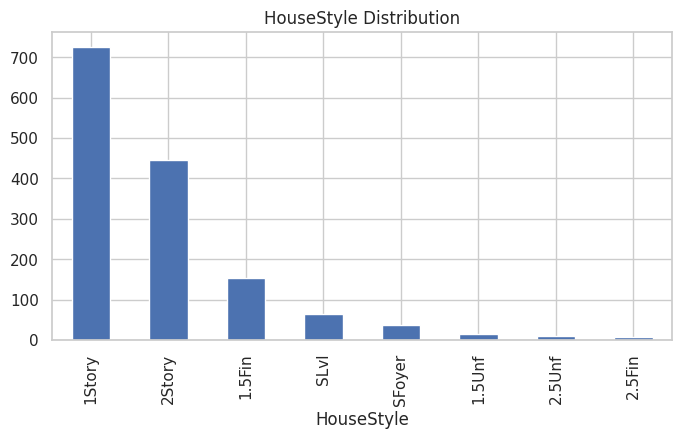

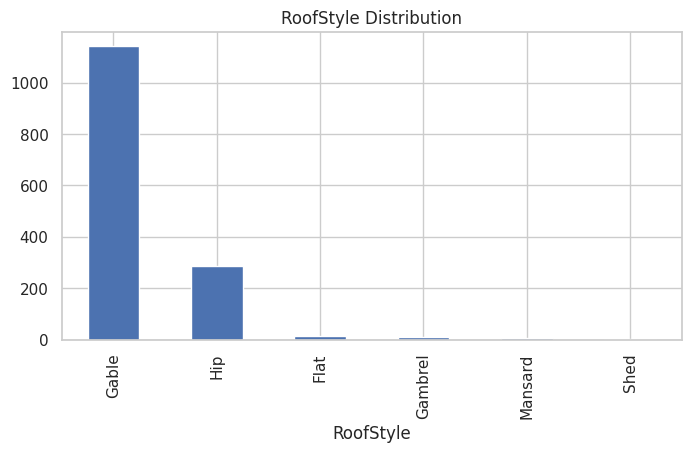

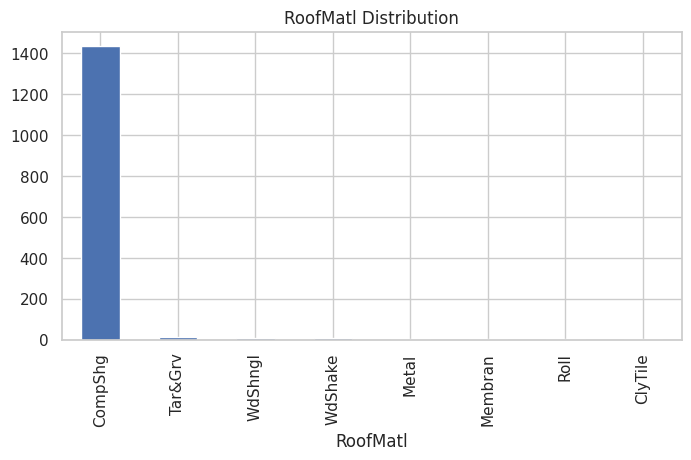

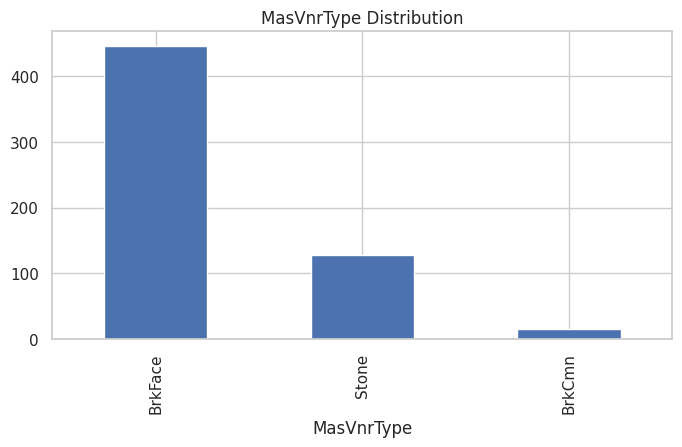

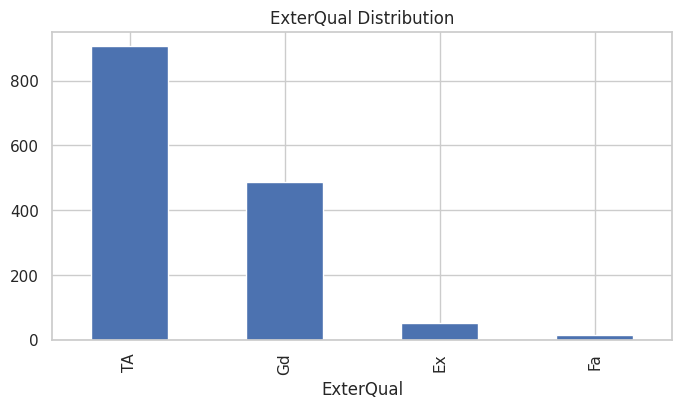

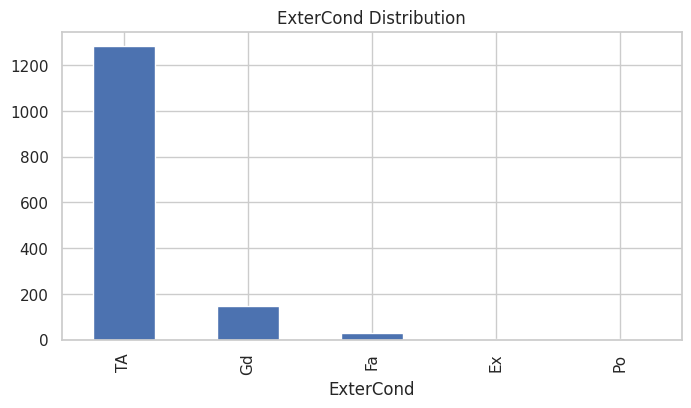

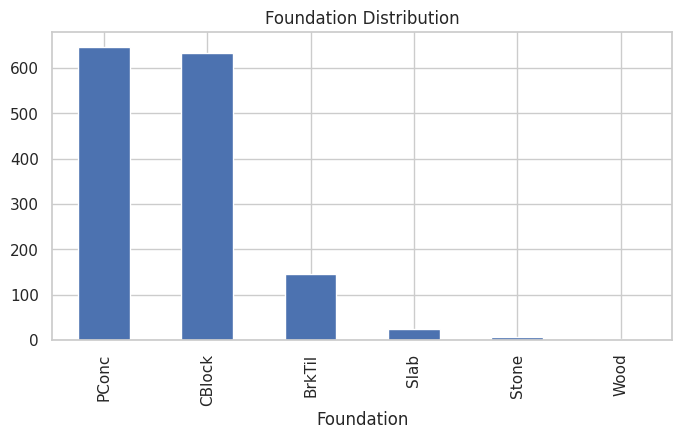

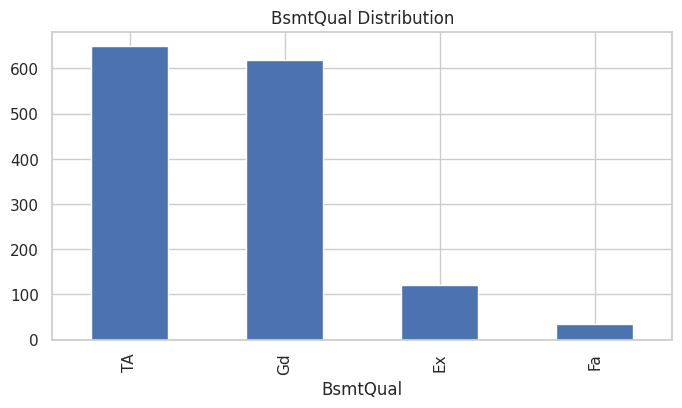

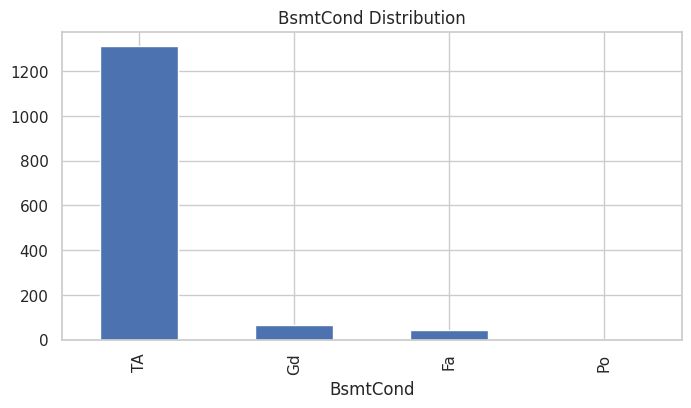

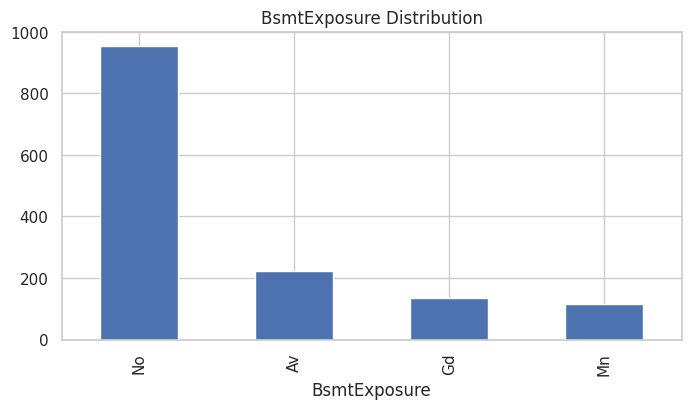

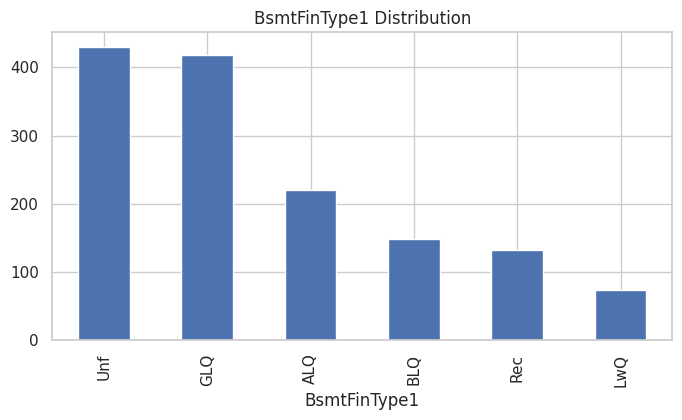

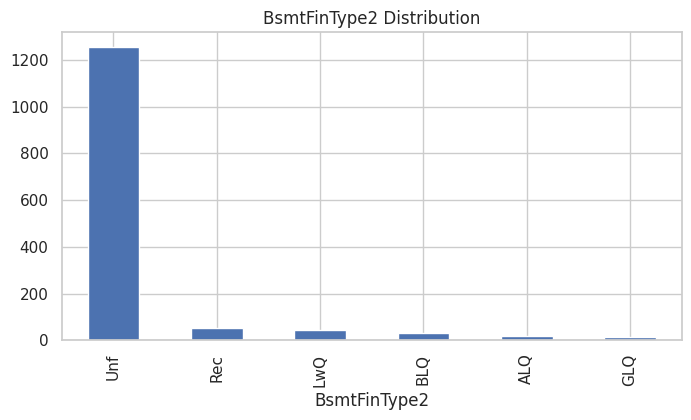

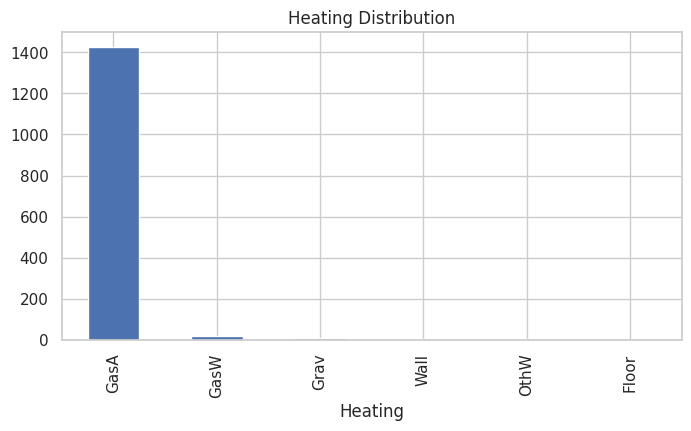

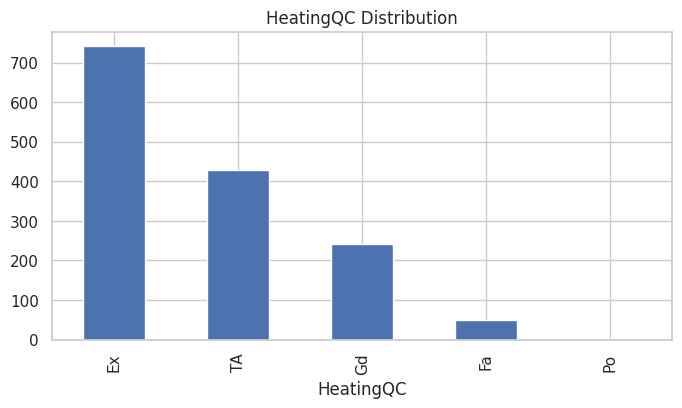

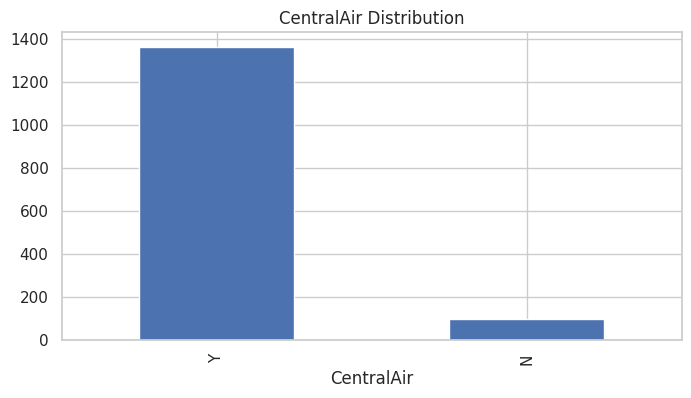

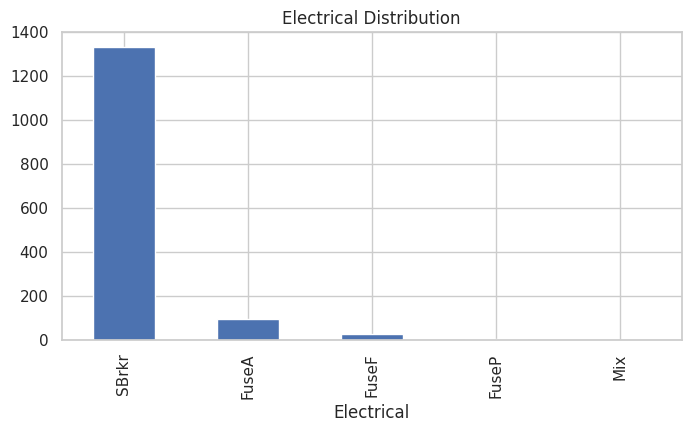

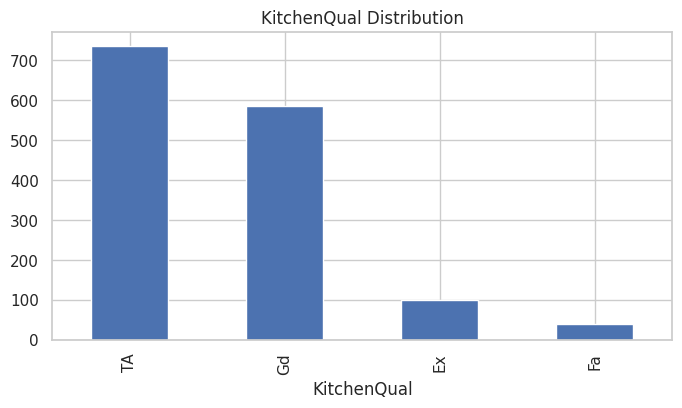

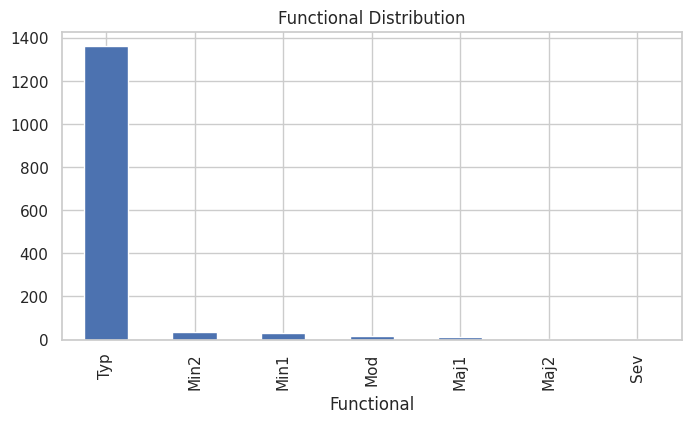

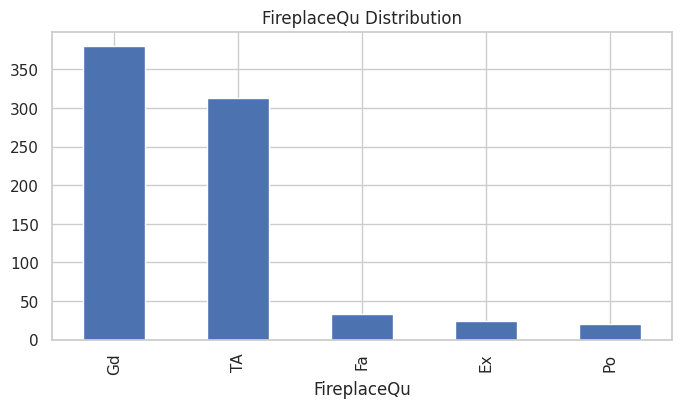

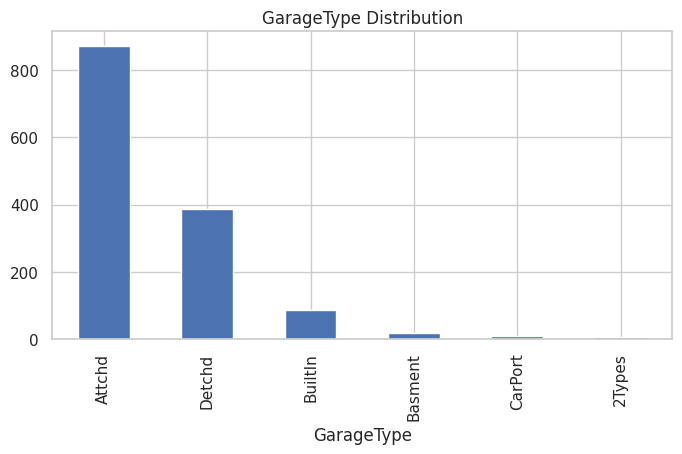

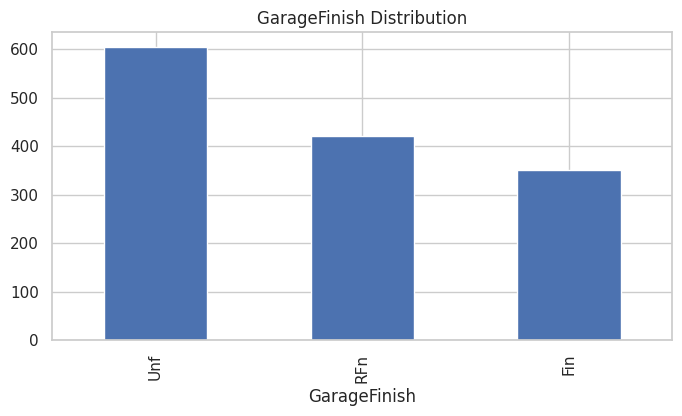

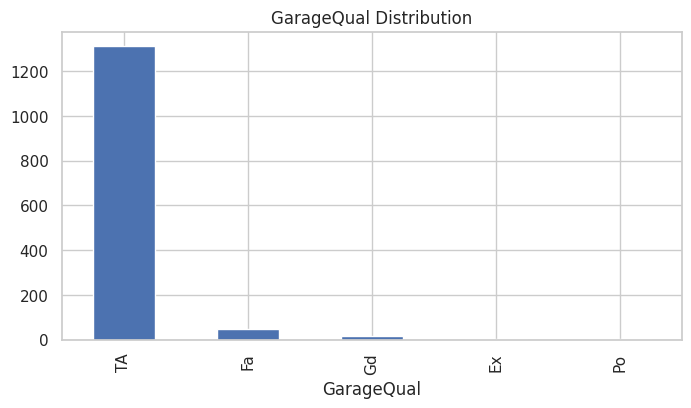

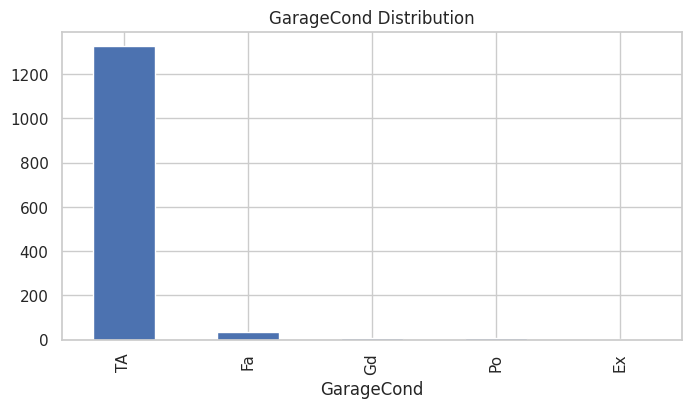

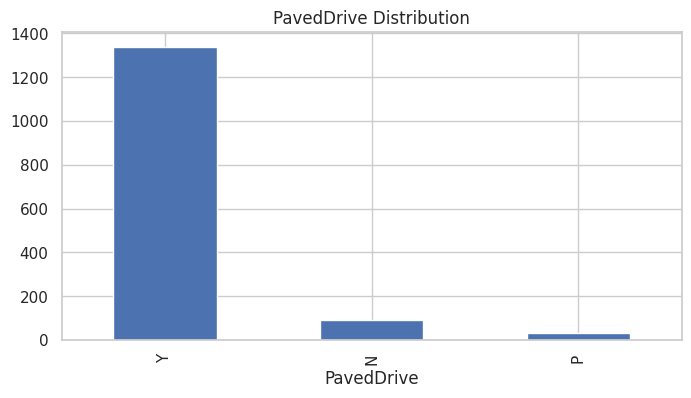

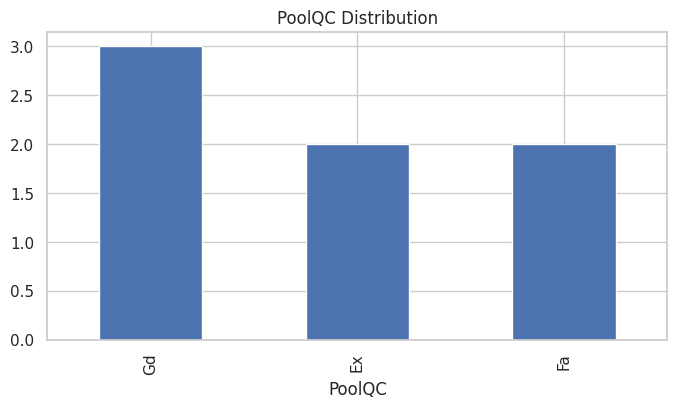

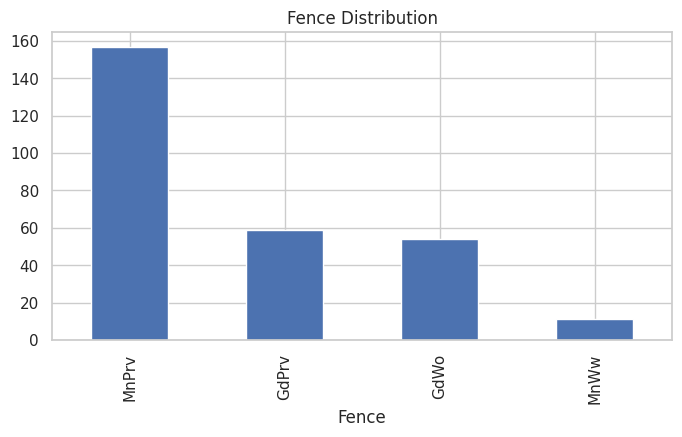

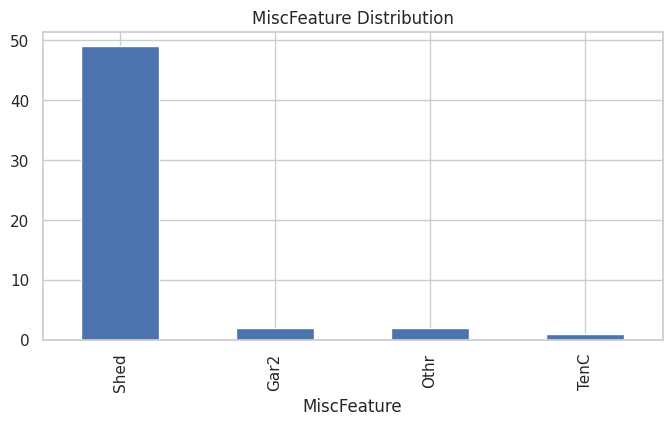

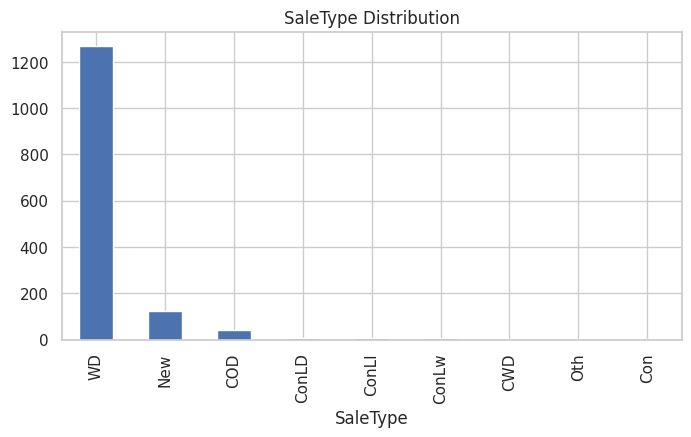

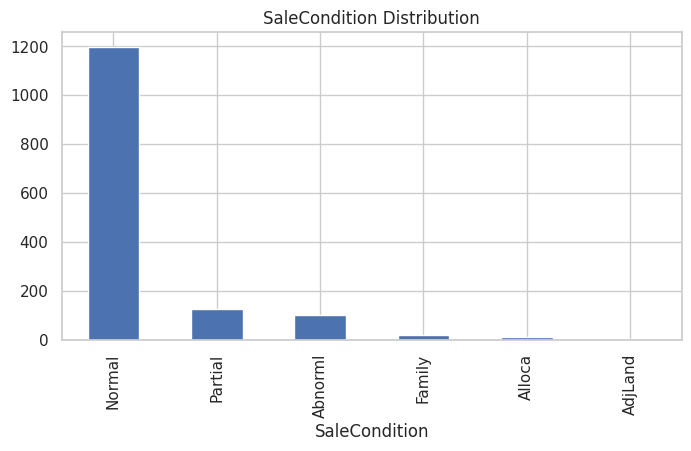

In [24]:
for col in low_cardinality:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} Distribution")
    plt.show()




In [25]:
for col in high_cardinality:
    print(col, "unique values:", df[col].nunique())
    print(df[col].value_counts().head(10))
    print("\n")




Neighborhood unique values: 25
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
Name: count, dtype: int64


Exterior1st unique values: 15
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Name: count, dtype: int64


Exterior2nd unique values: 16
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
Name: count, dtype: int64




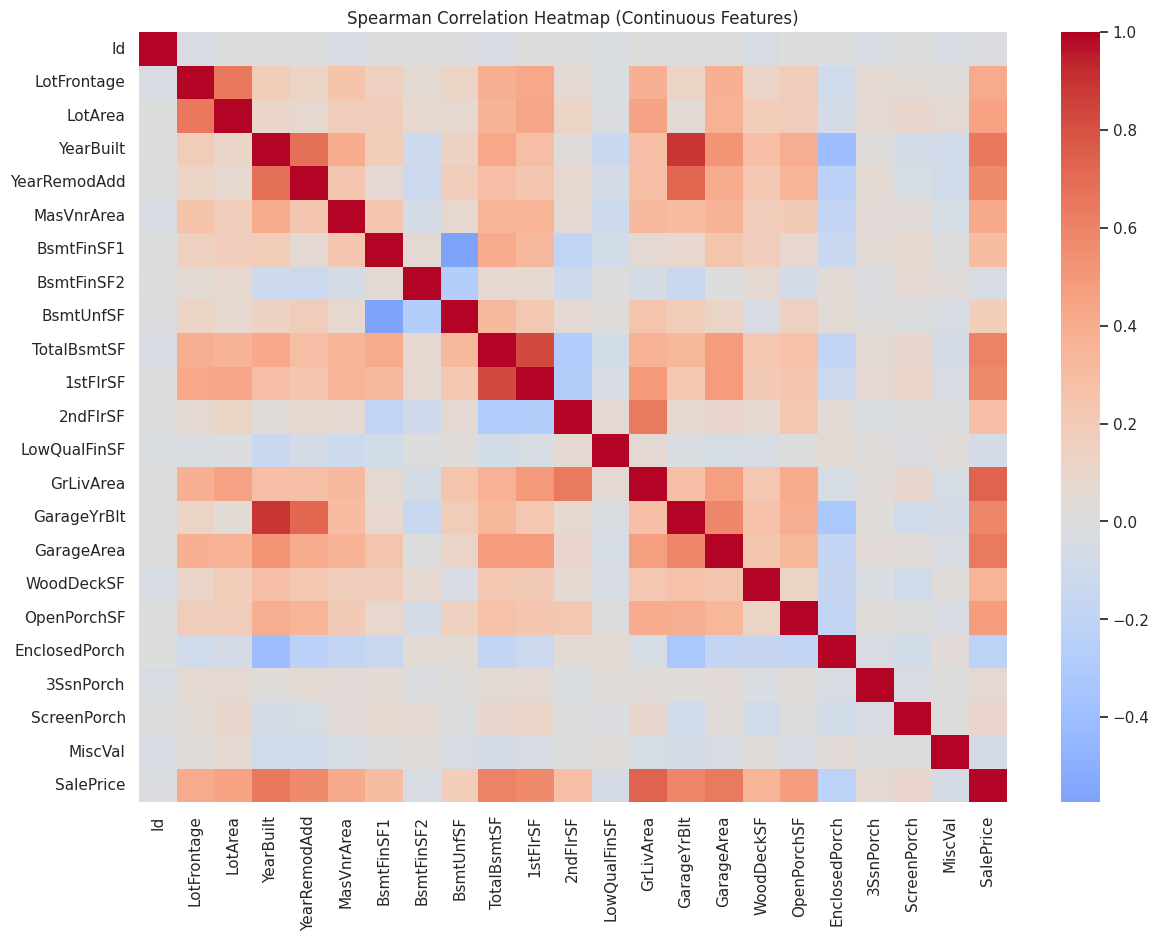

In [26]:
corr = df[continuous_cols].corr(method='spearman')

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Spearman Correlation Heatmap (Continuous Features)")
plt.show()




## Relationship with Tareget variable: `Sale Price`

*   Distribution of SalePrice
*   Log transformation
*   collreation with all features
*   top 15 strongest predictors









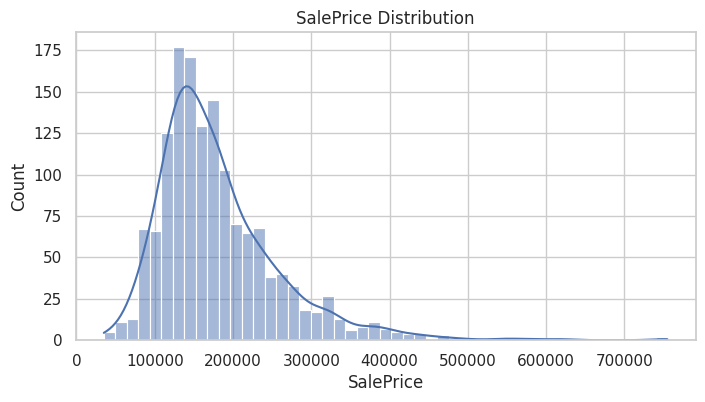

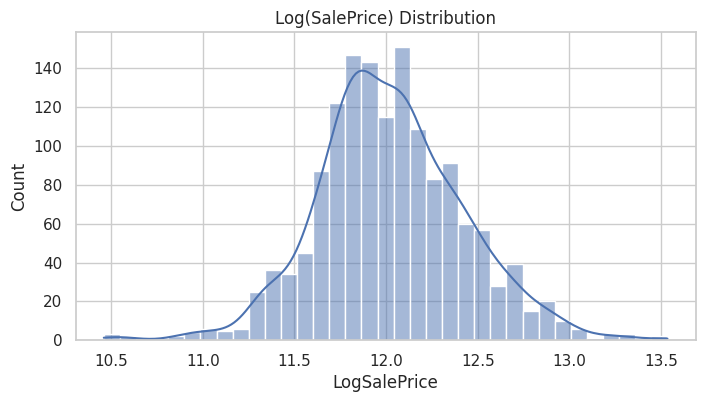

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

import numpy as np
df['LogSalePrice'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(8,4))
sns.histplot(df['LogSalePrice'], kde=True)
plt.title("Log(SalePrice) Distribution")
plt.show()




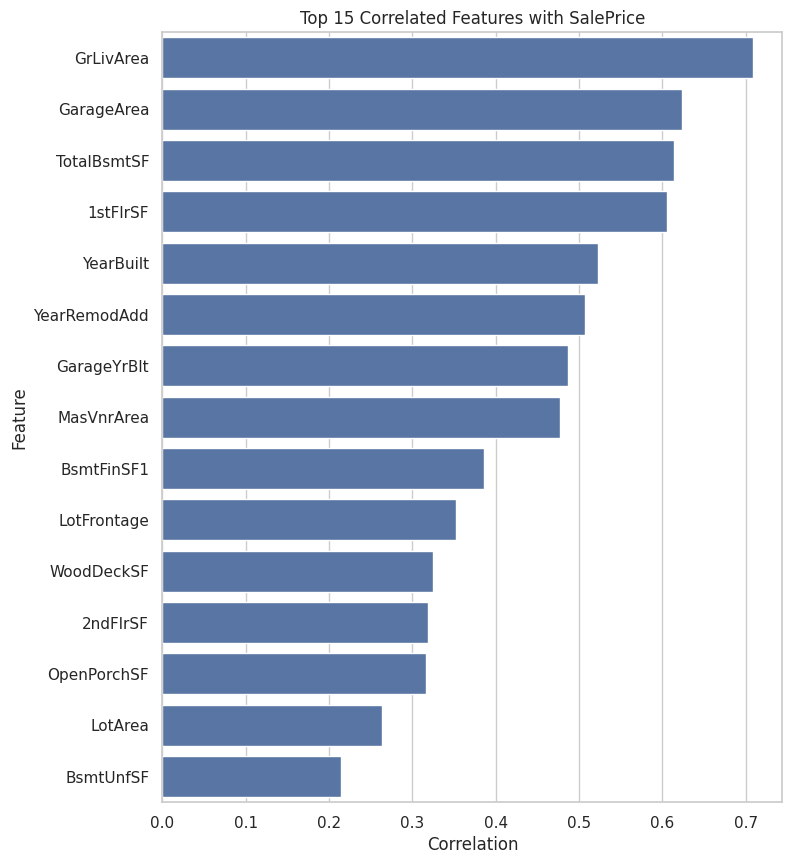

In [33]:
# Recompute clean correlation list
corr_matrix = df[continuous_cols + ['SalePrice']].corr()
target_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Exclude SalePrice itself and take top 15 predictors
top_15 = target_corr.drop('SalePrice').head(15)

plt.figure(figsize=(8,10))
sns.barplot(x=top_15.values, y=top_15.index, orient='h')
plt.title("Top 15 Correlated Features with SalePrice")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


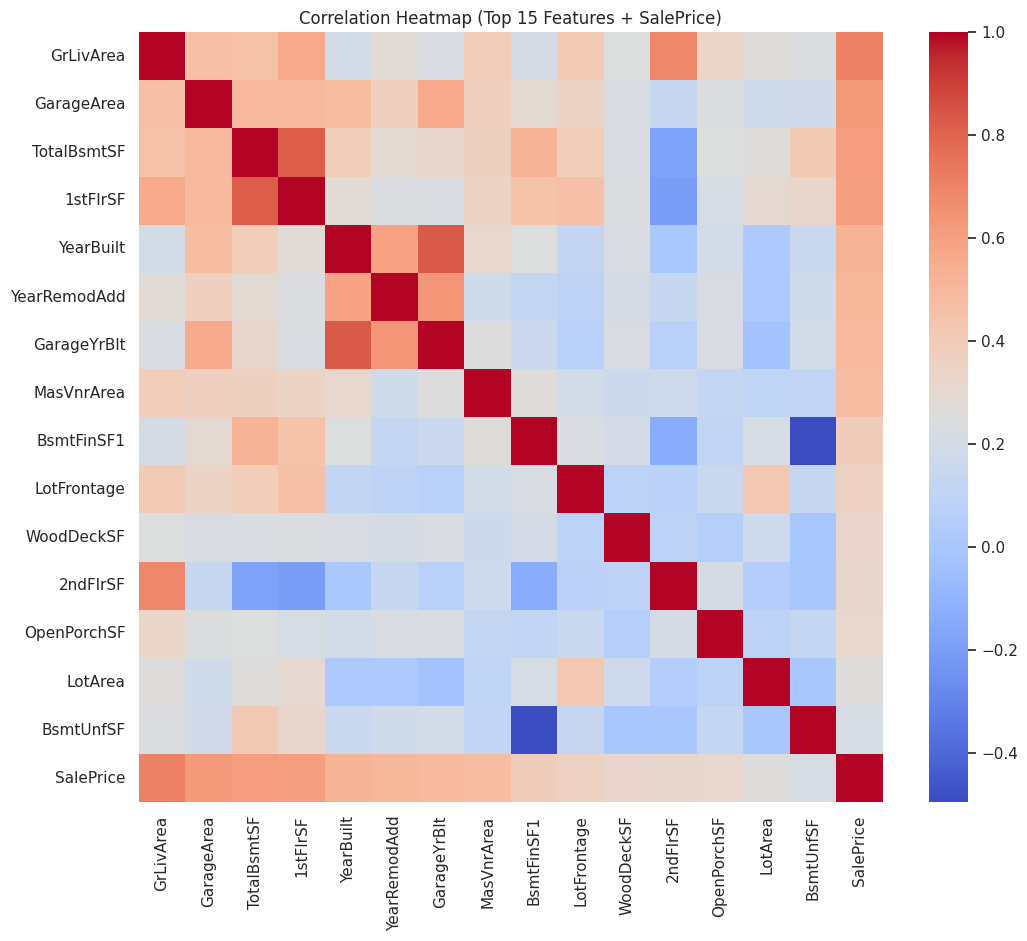

In [34]:
top_features = top_15.index.tolist()
heatmap_data = df[top_features + ['SalePrice']].corr()

plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Top 15 Features + SalePrice)")
plt.show()



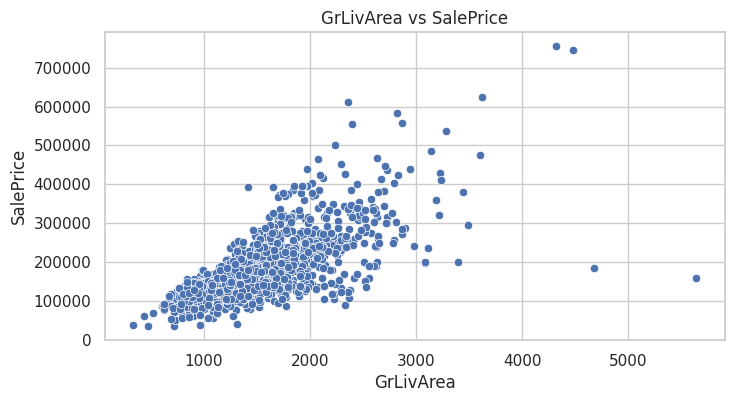

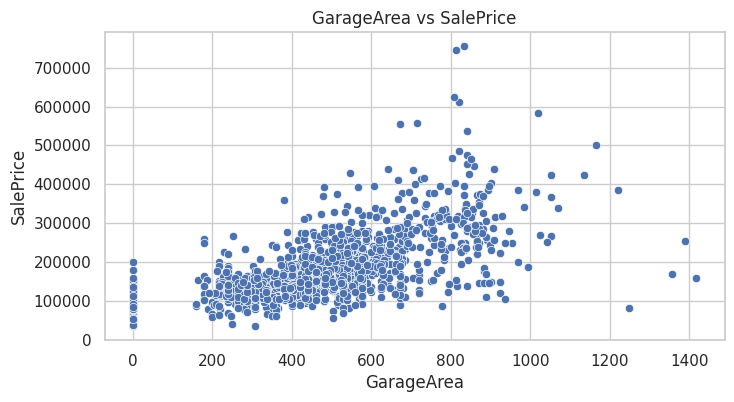

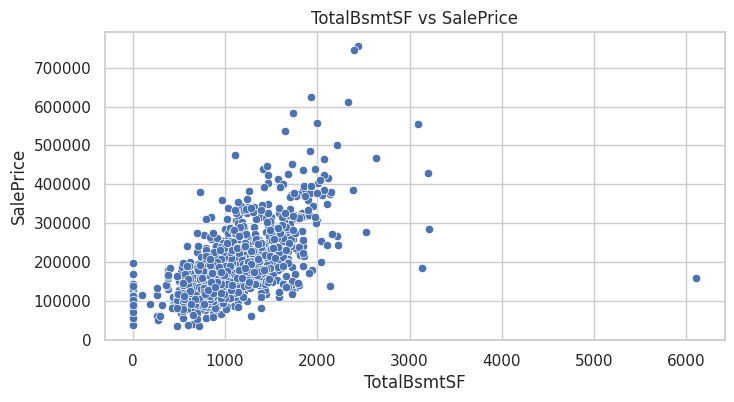

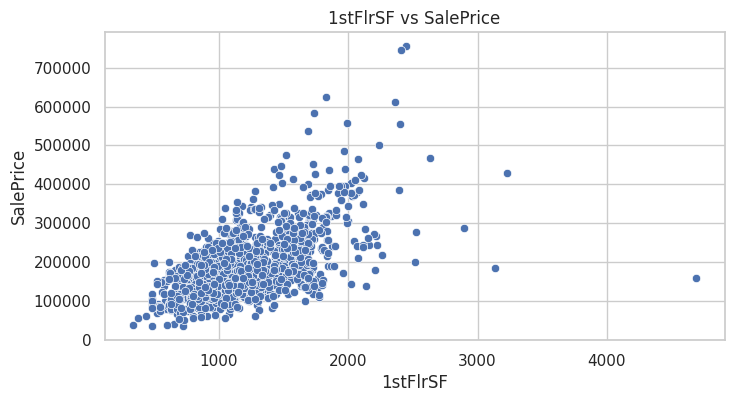

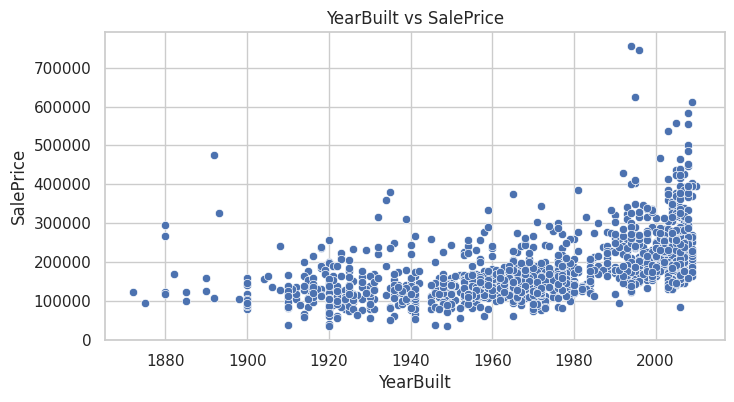

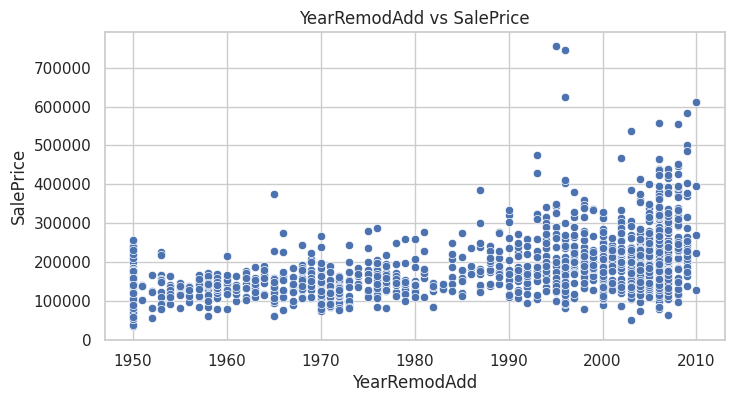

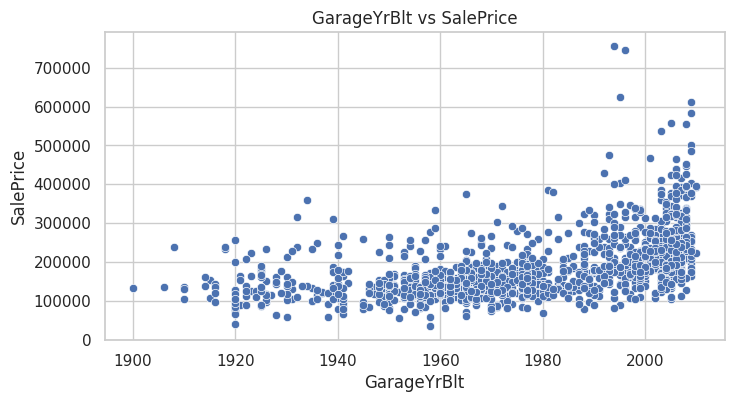

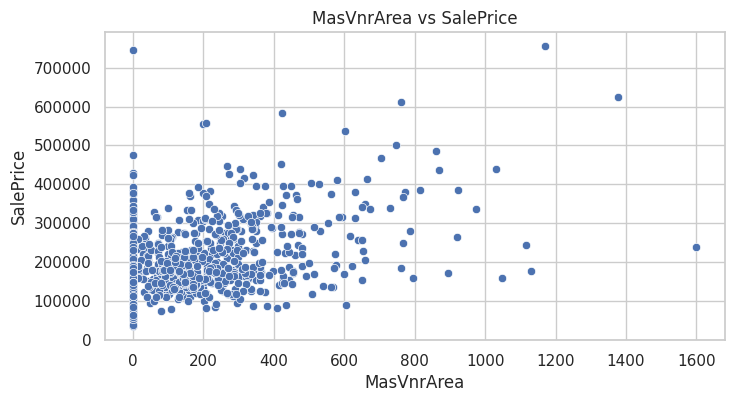

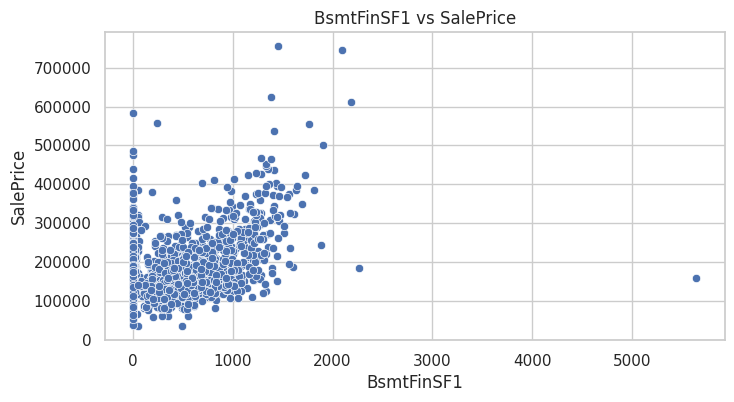

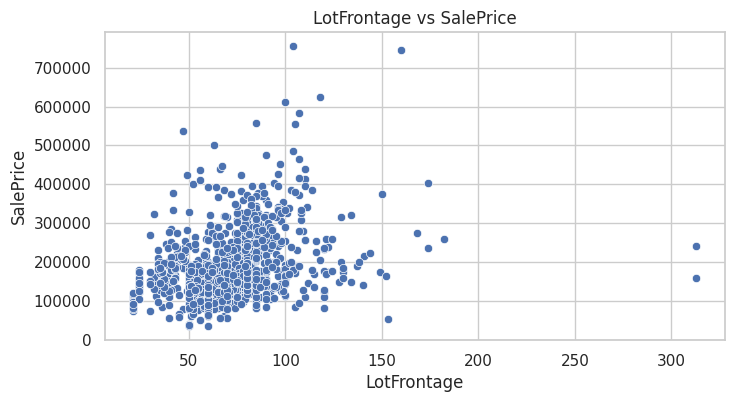

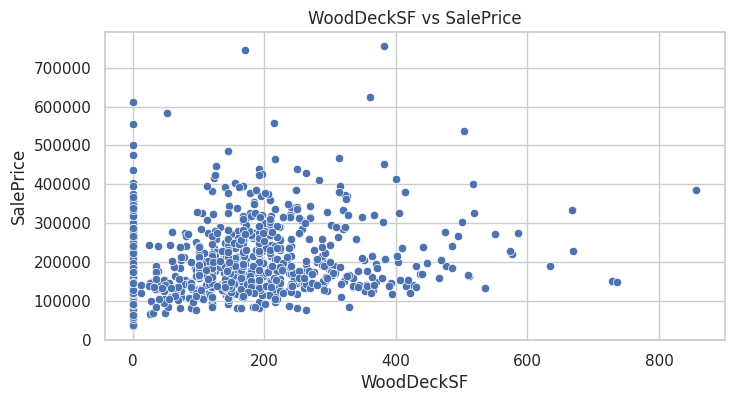

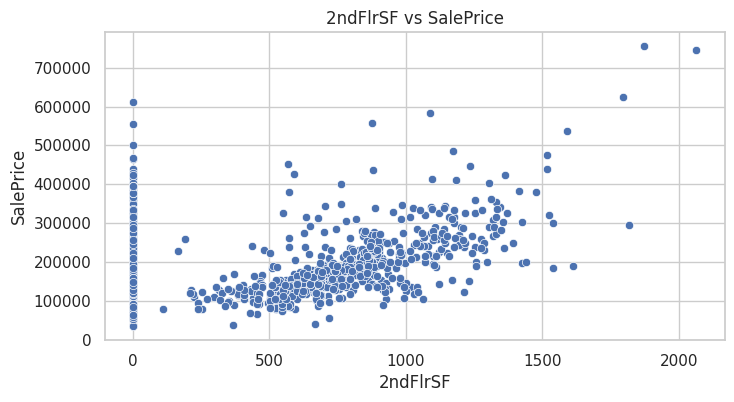

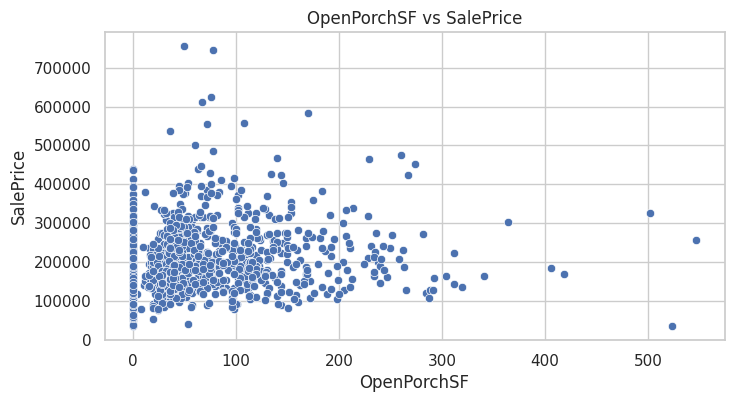

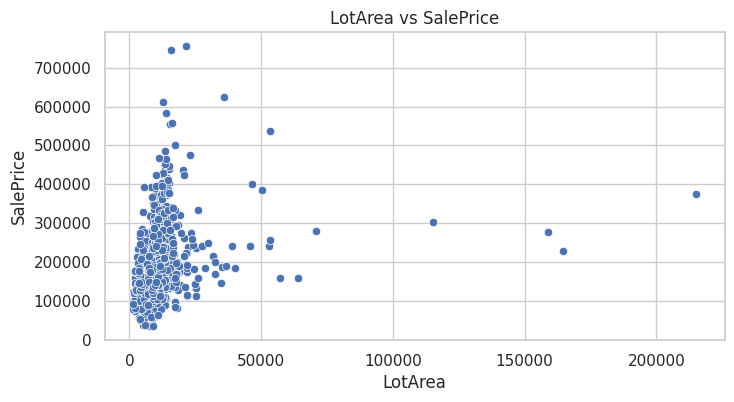

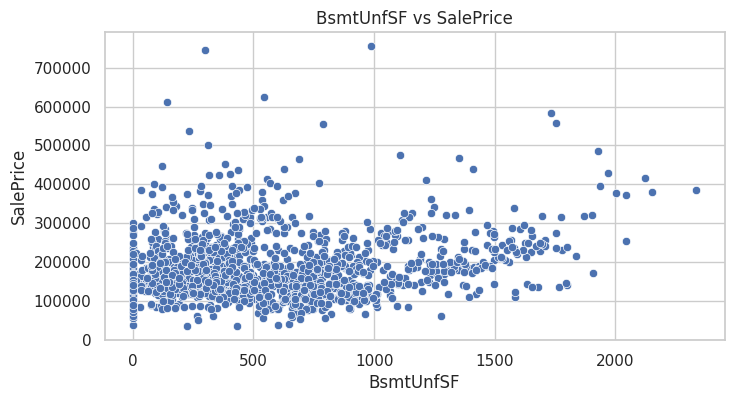

In [35]:
for col in top_features:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()


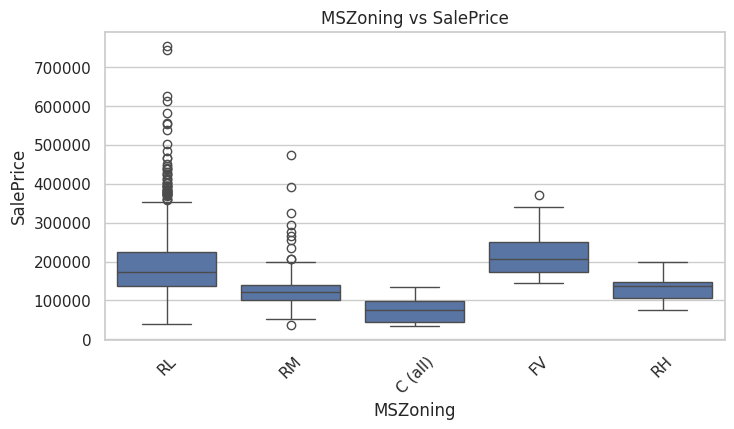

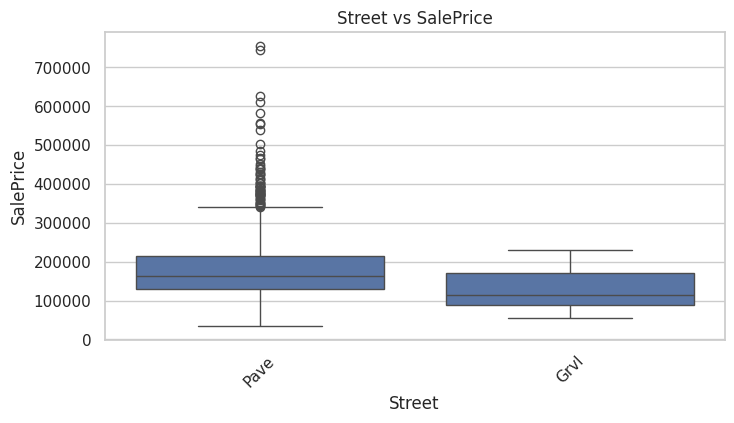

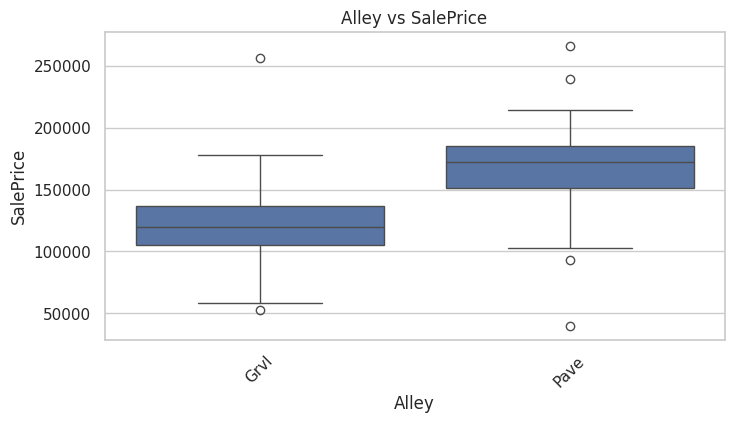

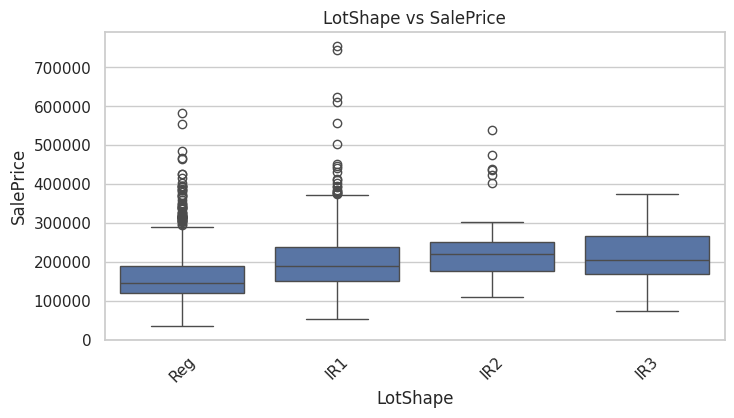

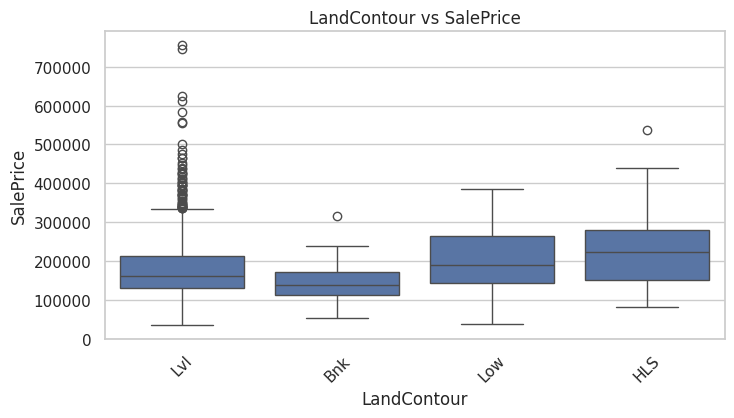

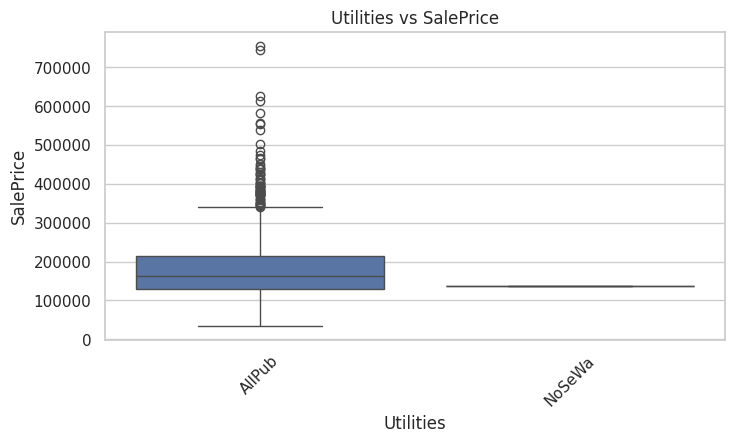

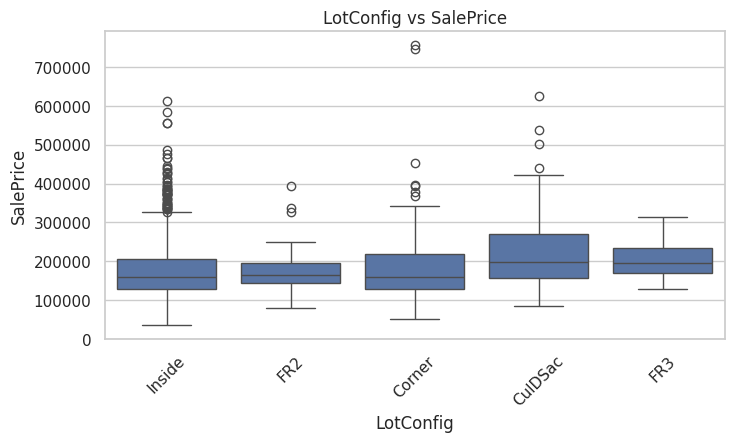

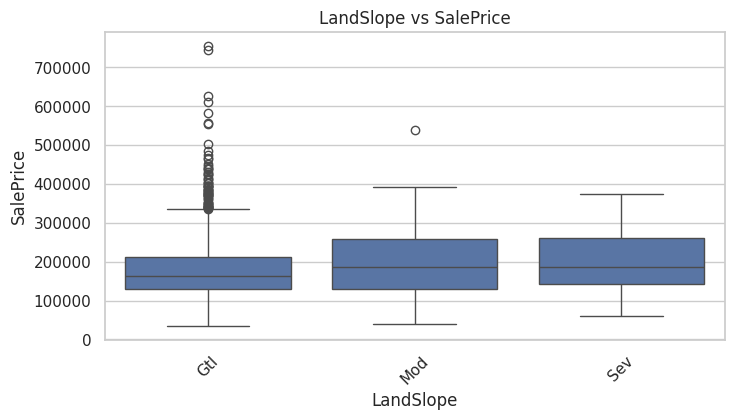

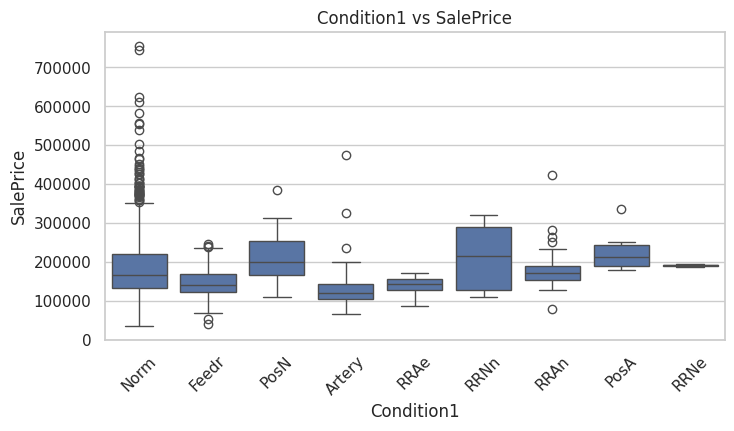

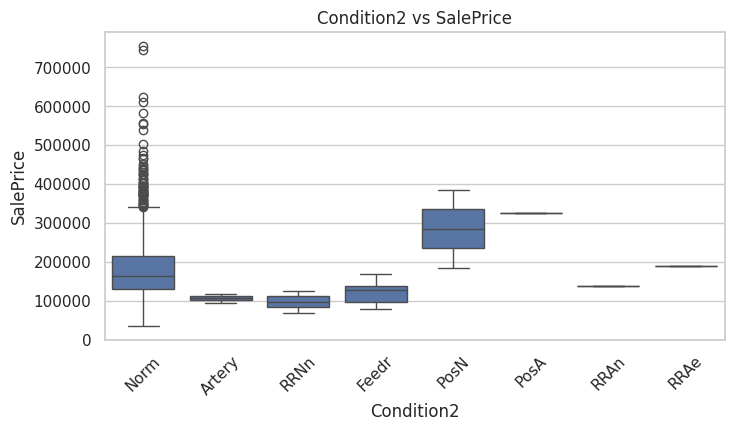

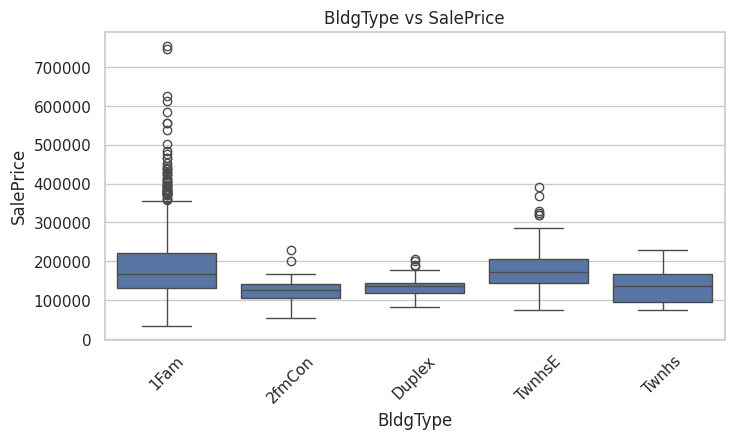

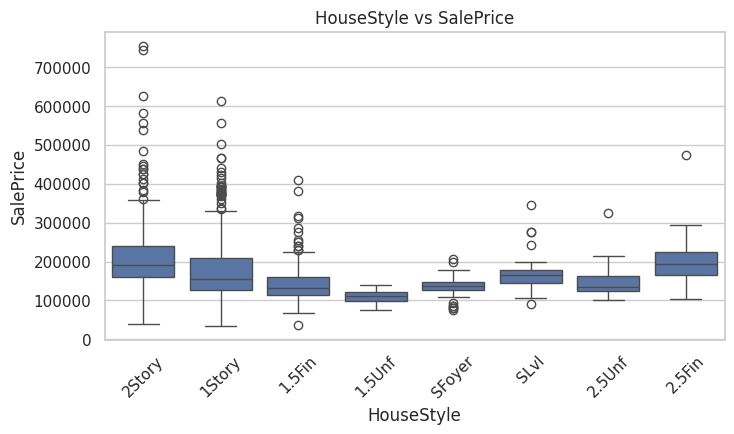

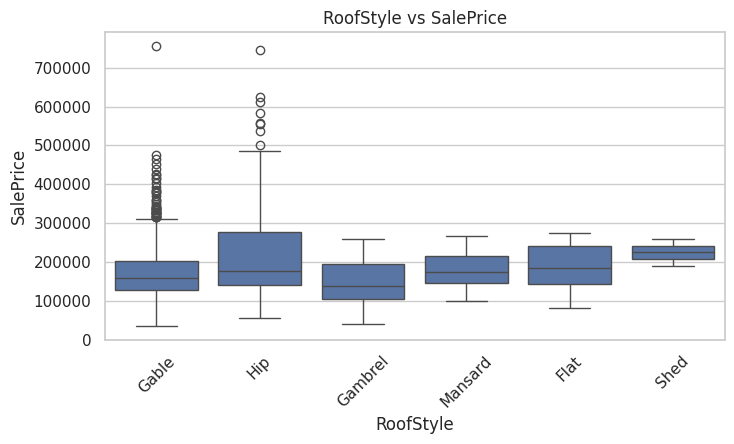

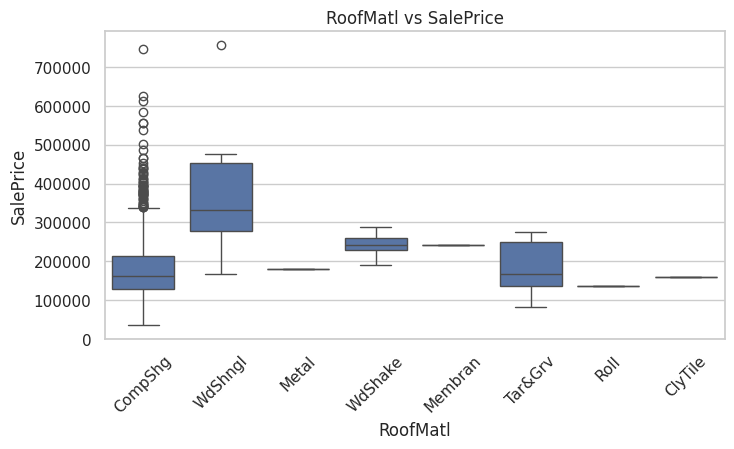

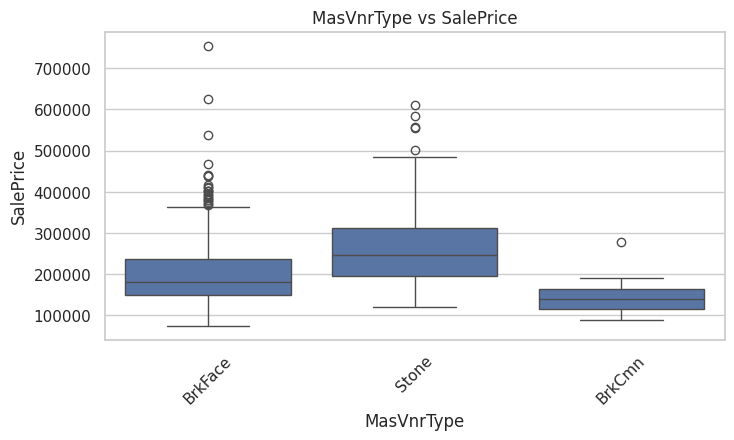

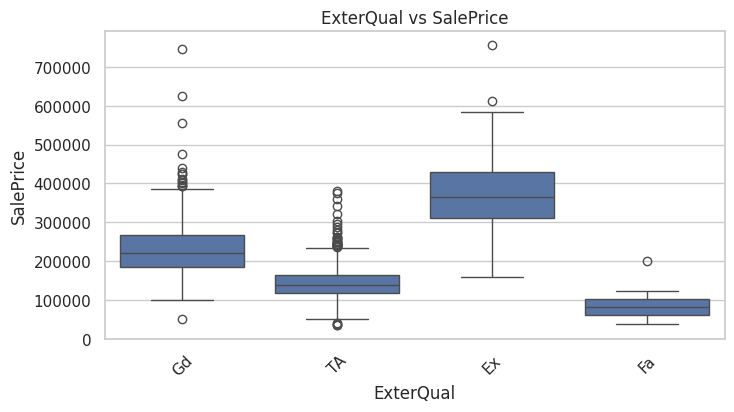

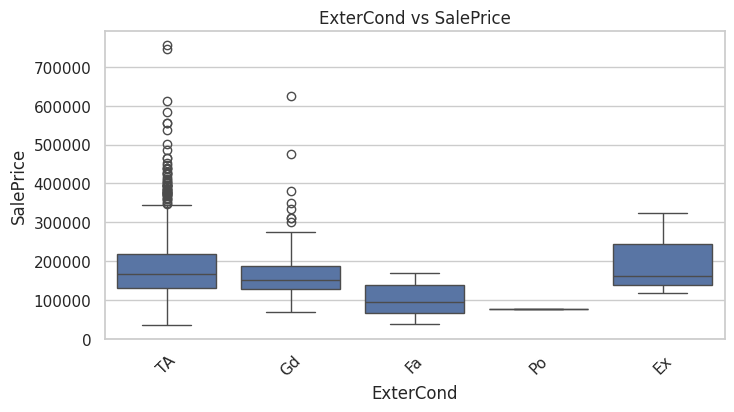

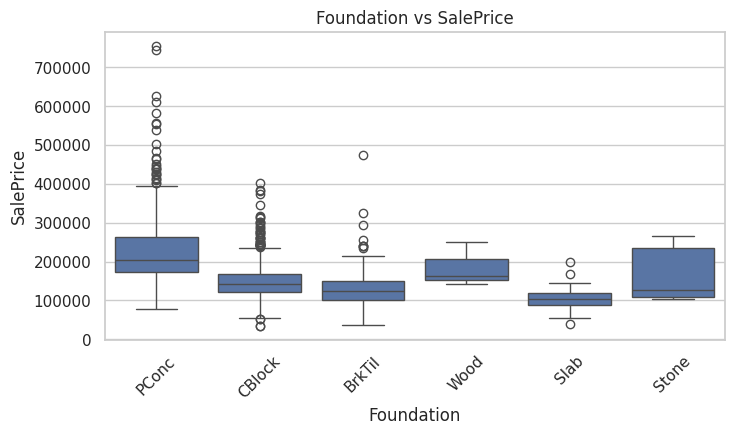

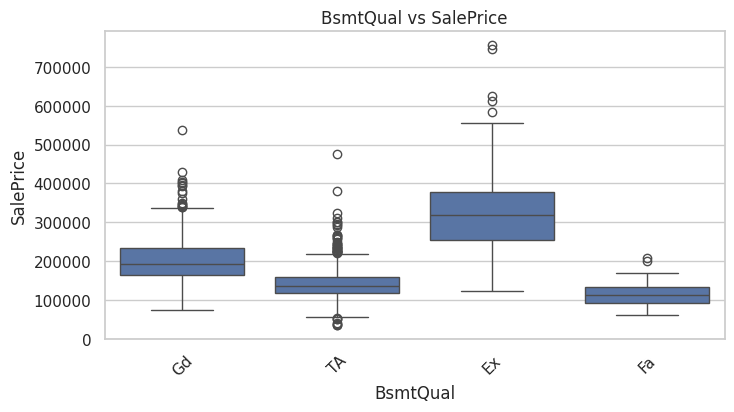

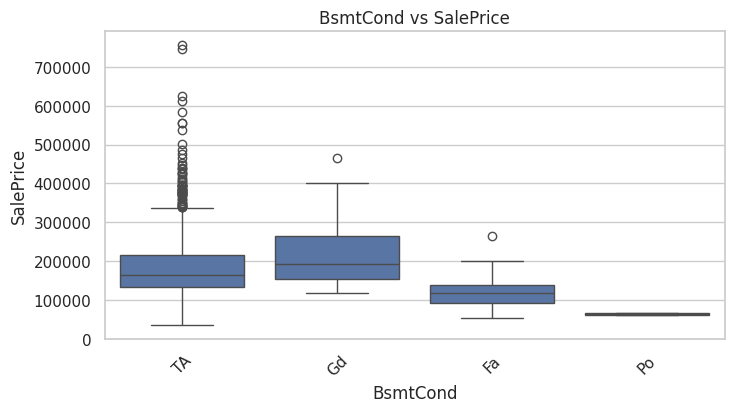

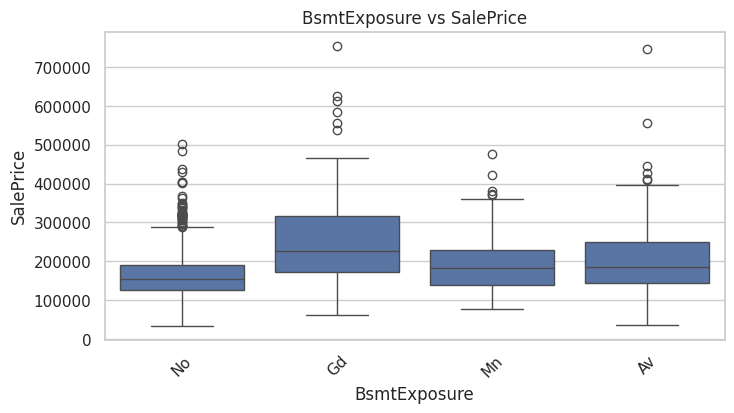

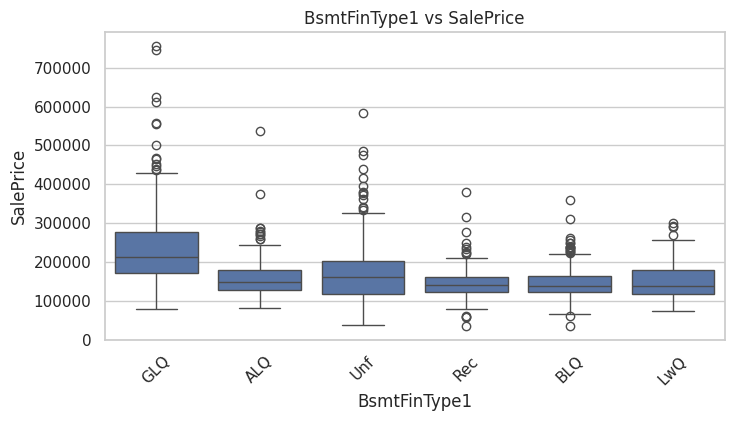

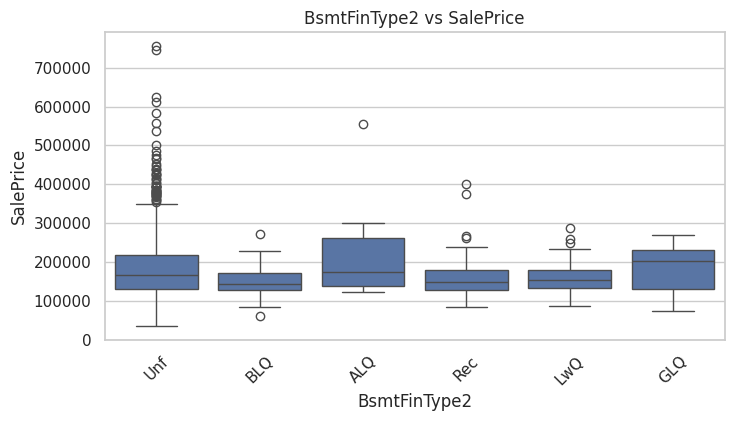

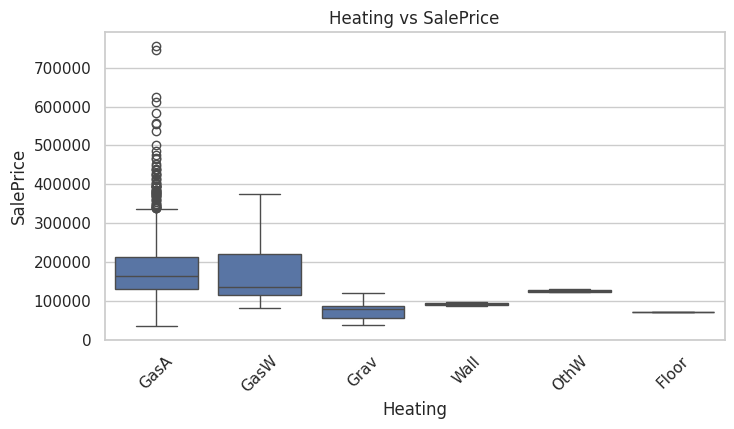

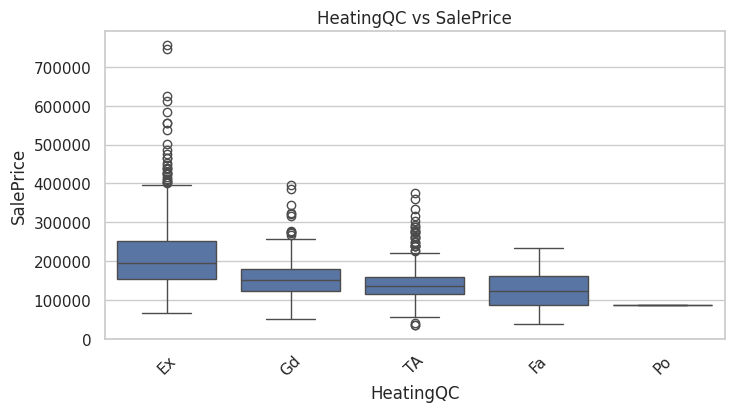

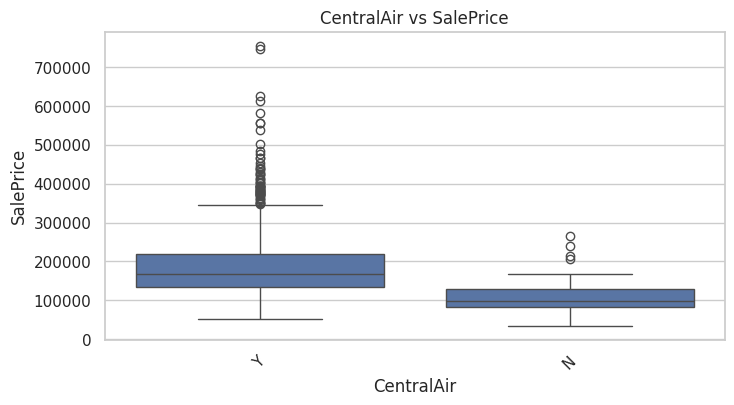

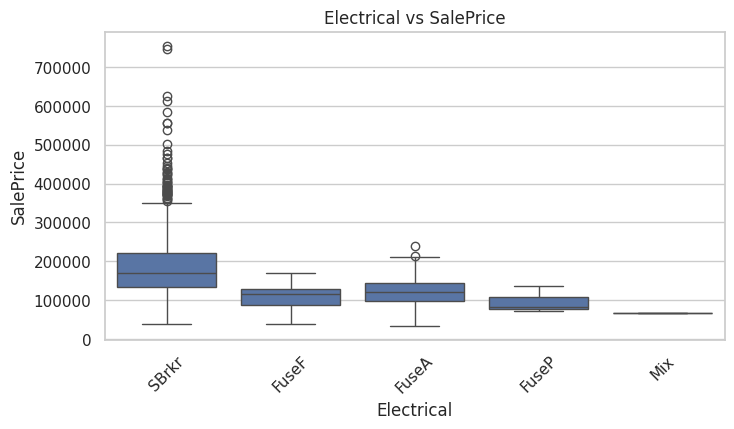

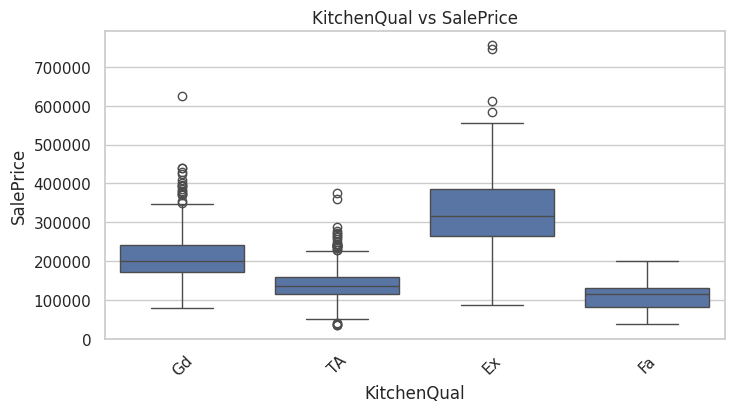

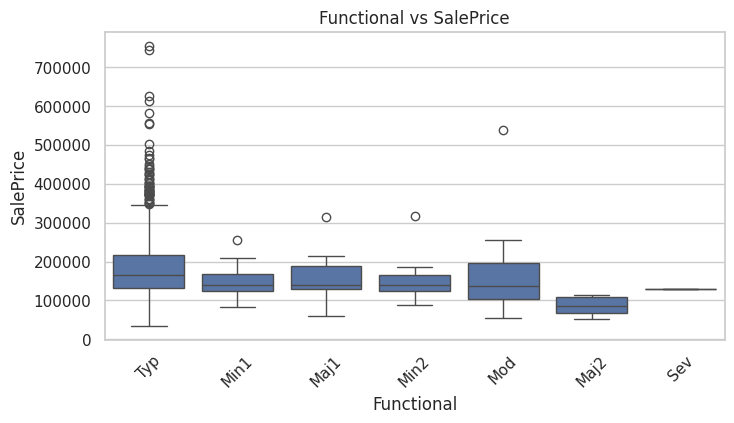

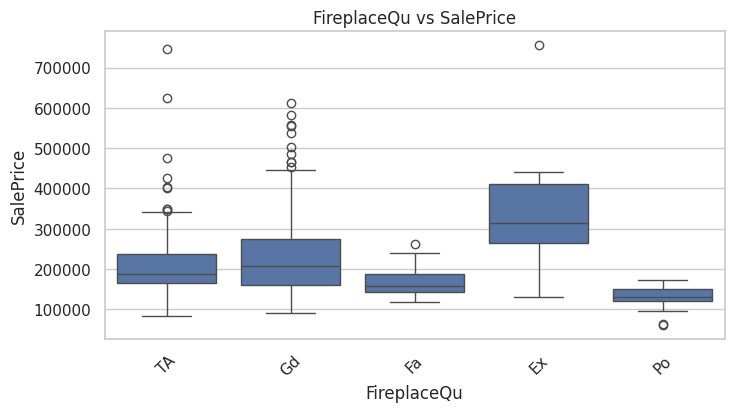

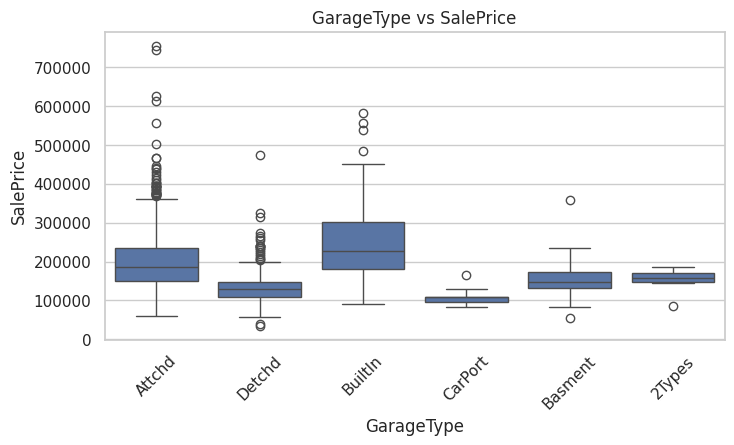

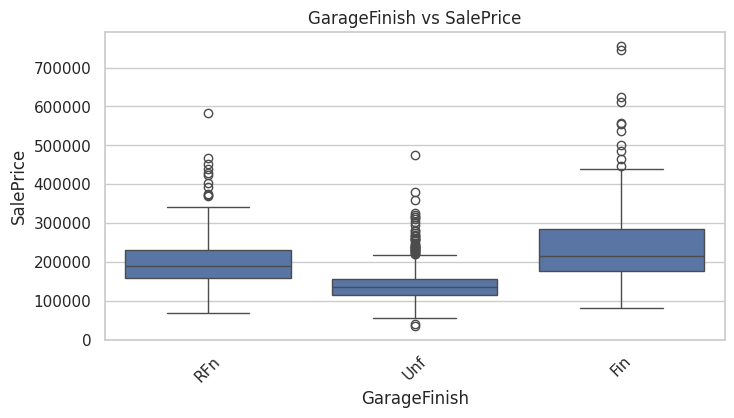

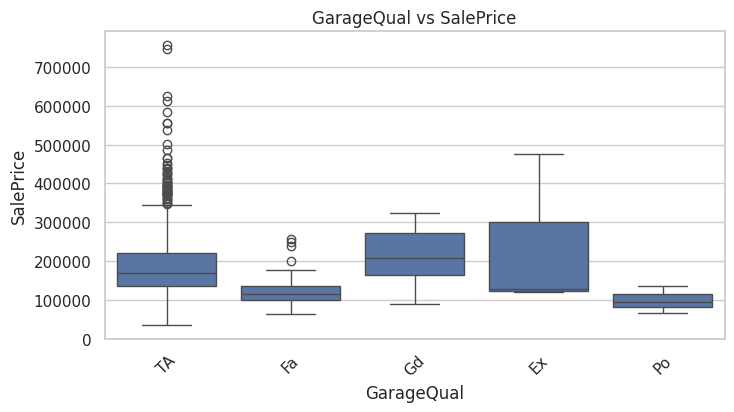

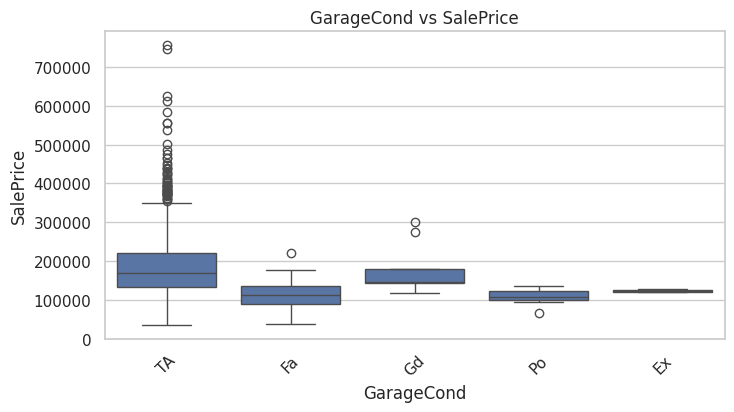

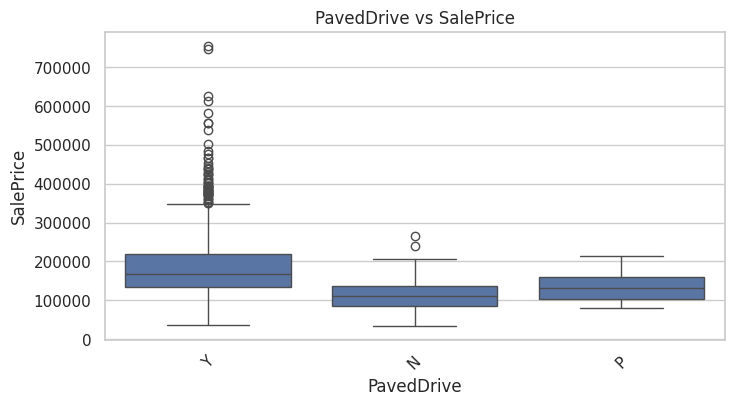

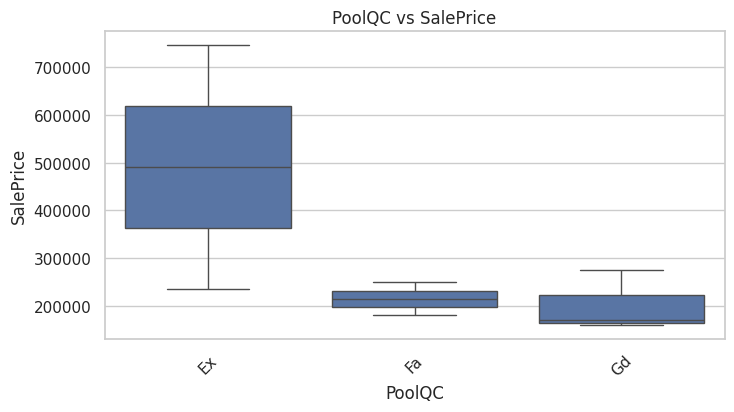

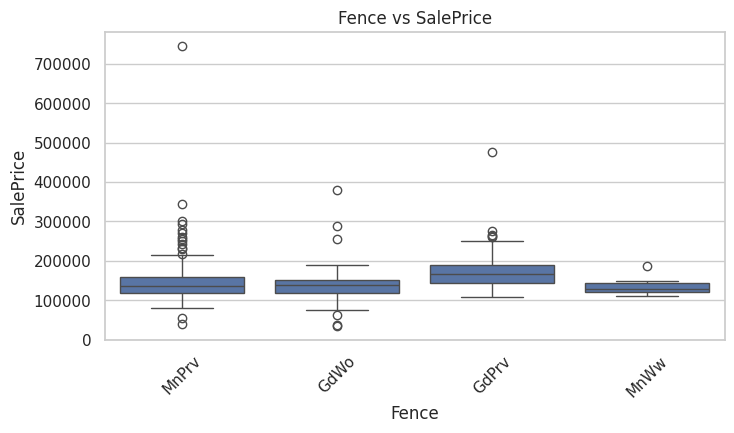

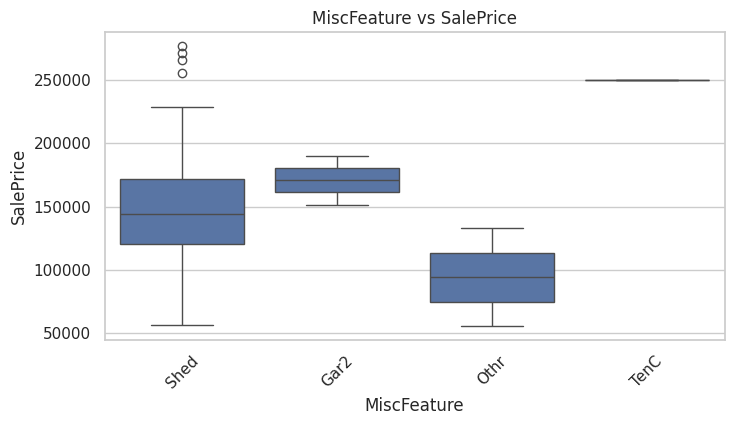

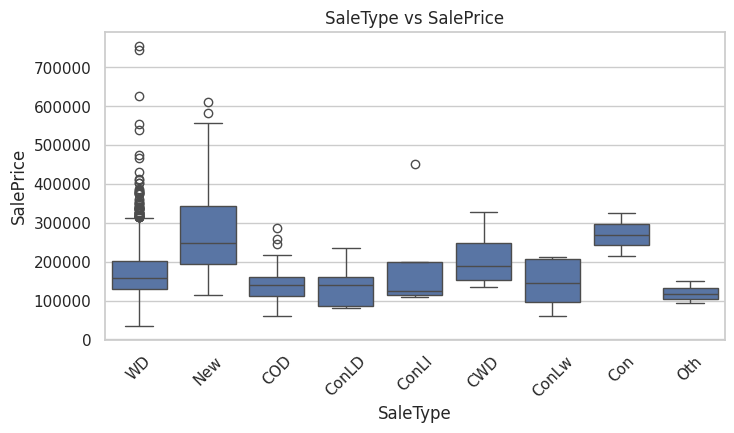

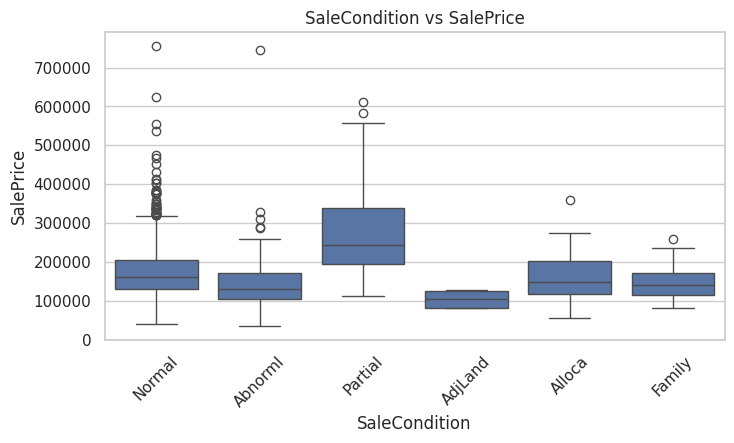

In [37]:
for col in low_cardinality:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f"{col} vs SalePrice")
    plt.xticks(rotation=45)
    plt.show()


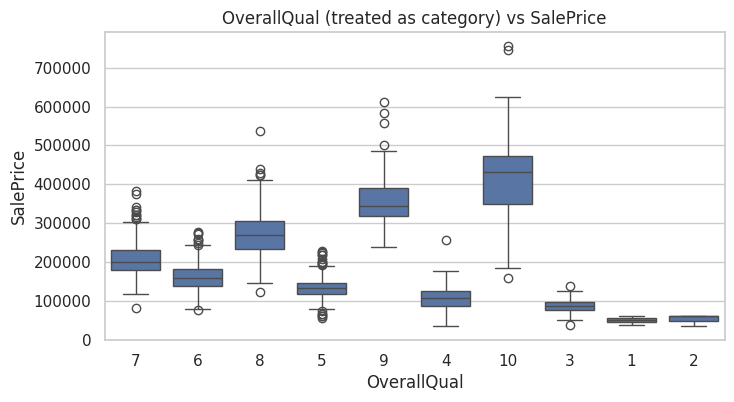

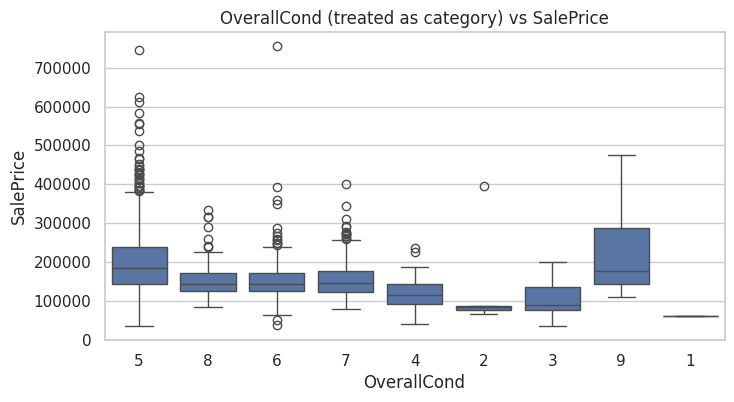

In [39]:
for col in ['OverallQual', 'OverallCond']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col].astype(str), y=df['SalePrice'])
    plt.title(f"{col} (treated as category) vs SalePrice")
    plt.show()


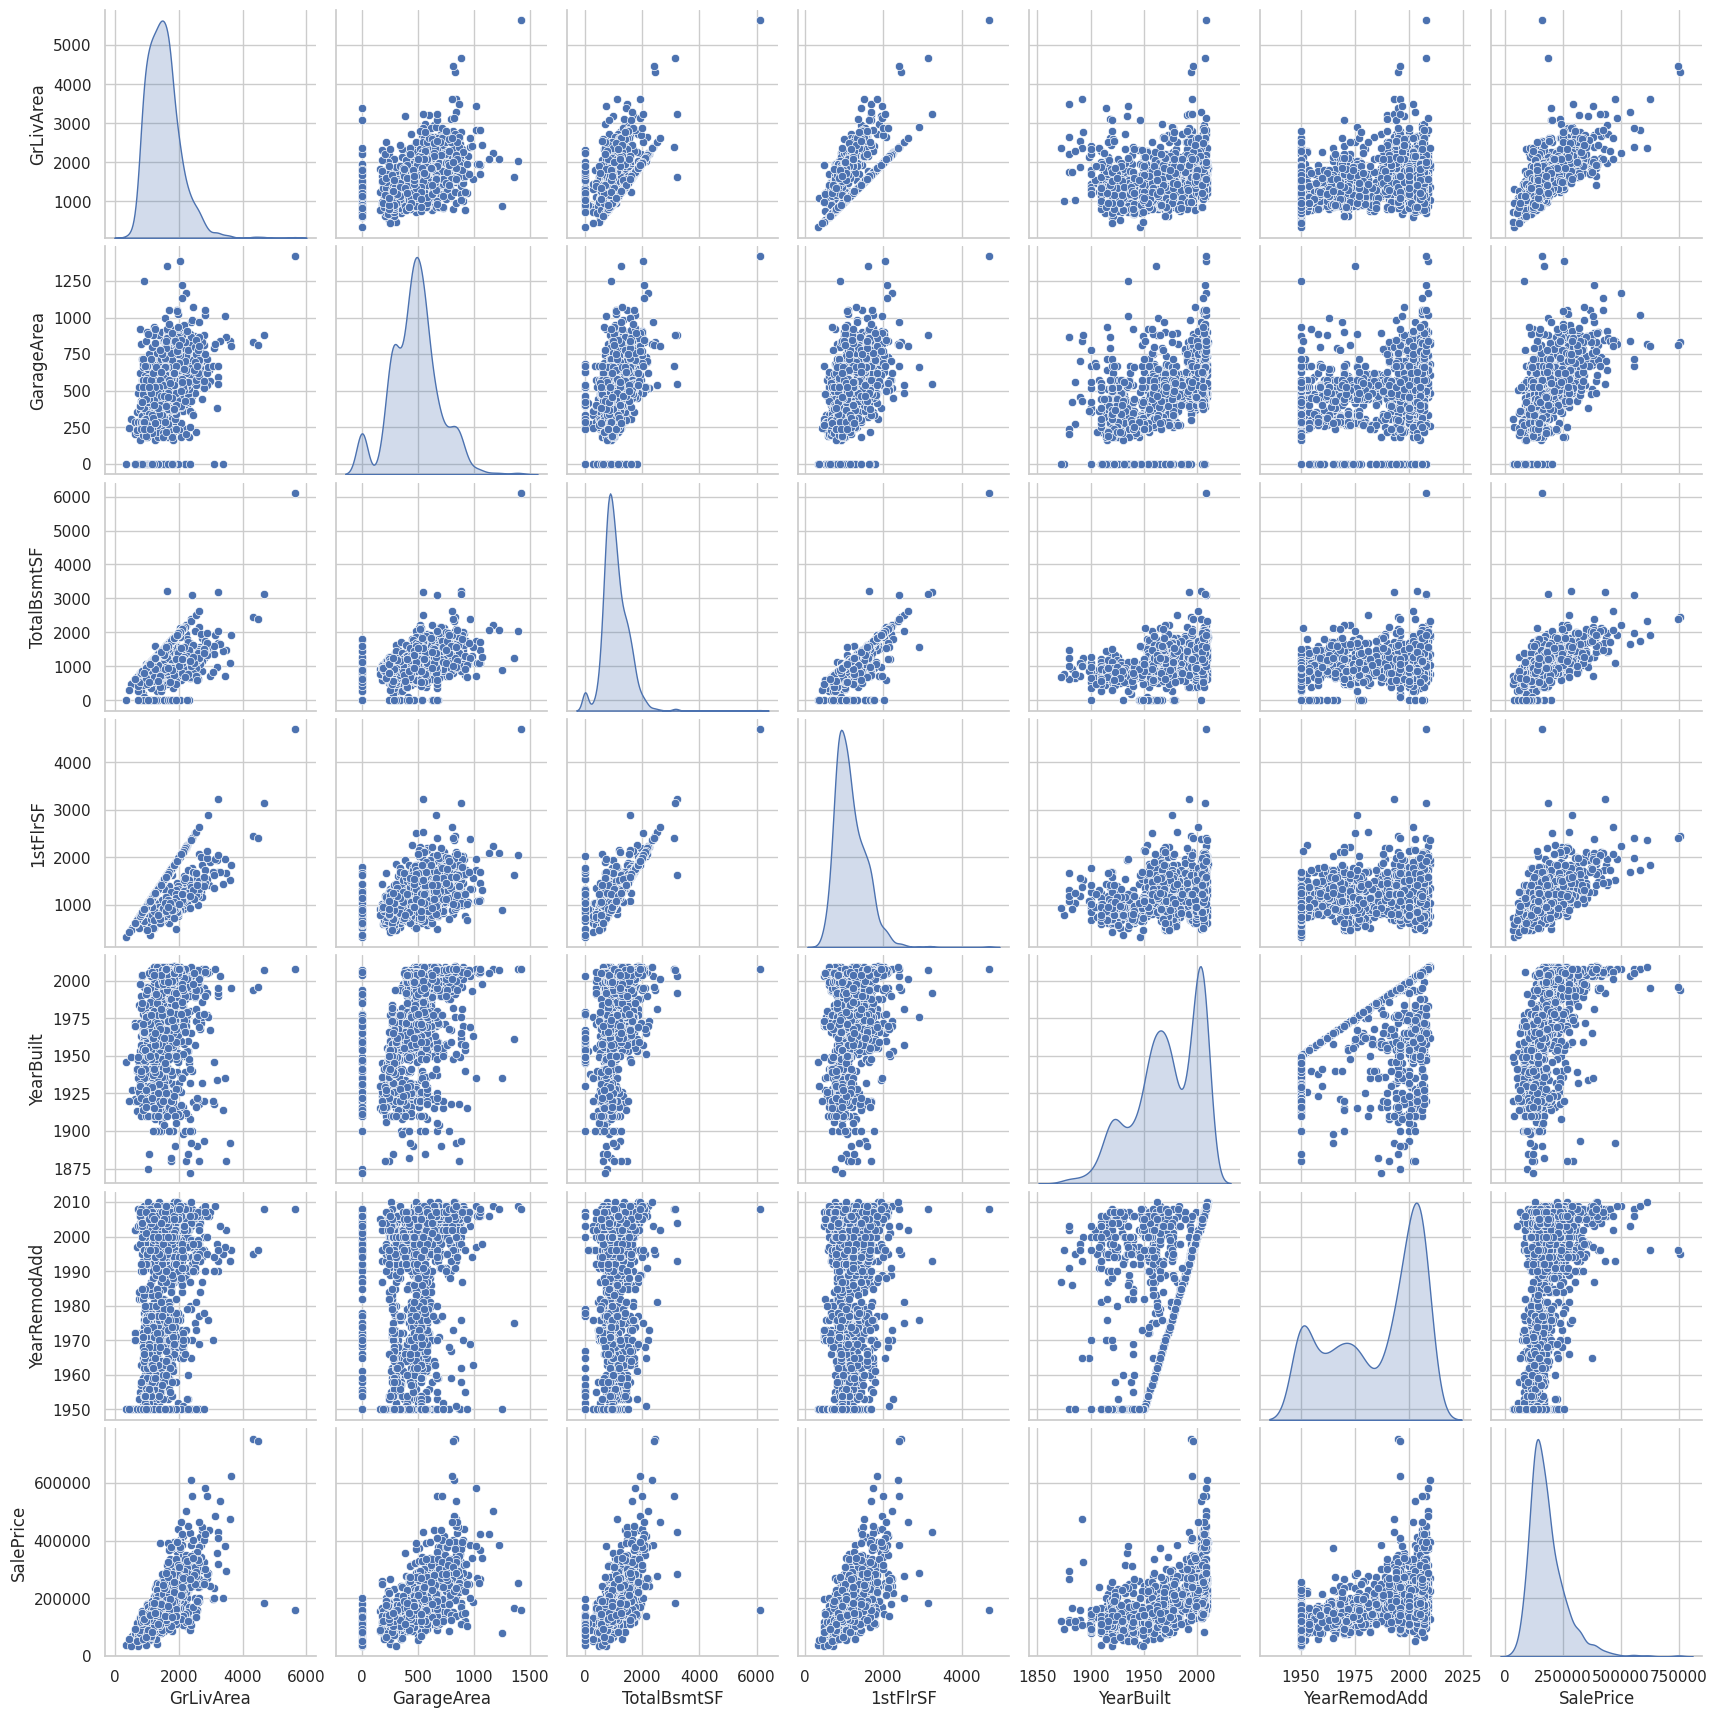

In [40]:
pairplot_vars = top_features[:6] + ['SalePrice']
sns.pairplot(df[pairplot_vars], diag_kind='kde')
plt.show()


# 🧠 EDA Summary

### Dataset Structure & Variable Types
To manage a dataset containing 79 variables, we use automated profiling techniques to categorise variables into:

* Continuous numeric features
* Discrete numeric features
* Low-cardinality categorical features
* High-cardinality categorical features

This structured approach is essential when dealing with high-dimensional datasets

### 🔍 Data Quality
A missing value heatmap highlights clear patterns of structural missingness, especially in features related to:

* basements
* garages
* masonry veneer
* pools
* Alleys

These missing patterns reflect real-world property characteristics (e.g., homes without basements).
This suggests that missingness itself may contain information, and binary missing indicators could be valuable for modelling.

## 📈 Univariate Analysis
###Continuous Features

Most continuous features exhibit right-skewed distributions typical of real-estate and financial datasets.
Applying transformations (such as log for price variables) can help normalise these distributions.

###Categorical Features

Low-cardinality categorical variables show meaningful class distributions.
High-cardinality features (e.g., neighborhoods) will require encoding strategies.

This stage highlights potential outliers, long-tailed features, and variables requiring transformation.


### 🔗 Correlations
####Feature to Feature
A Spearman correlation heatmap reveals:

* strong multicollinearity among size-related features (e.g., GrLivArea, TotalBsmtSF)
* strong correlations among quality features (e.g., OverallQual, OverallCond)
* weak correlations for demographic-like variables

Understanding these relationships is crucial for feature engineering and avoiding redundancy in modelling.

#### Feature to Target Variables
SalePrice exhibits a right-skewed distribution.
Applying a log transformation creates a more normal distribution and improves linear model performance.

Correlation analysis reveals strong relationships with:

* OverallQual
* GrLivArea
* GarageCars / GarageArea
* TotalBsmtSF
* FullBath
* YearBuilt / YearRemodAdd

Scatterplots confirm mostly monotonic relations with SalePrice, while boxplots demonstrate clear price stratification across categorical variables like Neighborhood, HouseStyle, and quality indicators.

---
## 🎓 Key Insights
1. Quality, size, and condition are the strongest predictors of house price.
2. Several features exhibit non-linear relationships with the target, suggesting transformations or non-linear models may perform better.
3. Structural missingness must be handled carefully and may be informative.
4. Log transformation of SalePrice is appropriate and beneficial.

Some variables exhibit multicollinearity, informing which predictors to include in linear models and which may benefit from dimensionality reduction techniques.

---

# 🟢 Next Steps (Week 2)
The insights from this EDA guide Week 2:

- Imputation and handling of structural missingness
- Log-transforming skewed numeric predictors
- Creating missing value indicators
- Handling categorical variables (ordinal encodings, one-hot encoding)
- Constructing an initial multiple linear regression model
- Moving to regularised models (Ridge, Lasso)
- Model diagnostics (residual analysis, RMSE, cross-validation)
